In [1]:
import numpy as np
import pandas as pd
import requests_html
import yahoo_fin
import ftplib
import io
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
from yahoo_fin.stock_info import *
import ta as TA

In [2]:
thy_stock = yf.download("THYAO.IS", "2019-01-01", "2022-12-31")

[*********************100%***********************]  1 of 1 completed


In [3]:
thy_stock

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,16.059999,16.129999,15.910000,16.100000,16.100000,12553160
2019-01-01,16.100000,16.100000,16.100000,16.100000,16.100000,0
2019-01-02,16.129999,16.250000,15.650000,15.680000,15.680000,48650466
2019-01-03,15.610000,16.000000,15.090000,15.150000,15.150000,60474927
2019-01-04,15.350000,15.450000,14.820000,15.090000,15.090000,51431175
...,...,...,...,...,...,...
2022-12-26,143.300003,145.300003,142.800003,145.000000,145.000000,43689692
2022-12-27,145.199997,146.600006,143.000000,143.100006,143.100006,63253933
2022-12-28,143.500000,143.800003,137.100006,140.100006,140.100006,48565337


In [4]:
type(thy_stock)

pandas.core.frame.DataFrame

In [5]:
thy_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1014 entries, 2018-12-31 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1014 non-null   float64
 1   High       1014 non-null   float64
 2   Low        1014 non-null   float64
 3   Close      1014 non-null   float64
 4   Adj Close  1014 non-null   float64
 5   Volume     1014 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.5 KB


In [6]:
thy_stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1.014000e+03
mean,25.194990,25.681864,24.766765,25.228984,25.228984,9.345251e+07
std,27.541207,28.138957,27.039686,27.622475,27.622475,5.252050e+07
min,7.600000,7.950000,7.410000,7.740000,7.740000,0.000000e+00
25%,12.150000,12.322500,11.990000,12.150000,12.150000,5.890022e+07
50%,13.575000,13.770000,13.350000,13.570000,13.570000,8.315024e+07
75%,22.555000,23.480000,22.050000,22.635000,22.635000,1.140632e+08
max,146.300003,148.000000,144.000000,145.899994,145.899994,4.921997e+08


In [7]:
rename_columns = {"Adj Close": "Price"}

In [8]:
thy_stock.rename(columns=rename_columns, inplace=True)

In [9]:
thy_stock["Return"] = thy_stock["Price"].diff()

In [10]:
thy_stock["Return_Percentage"] = thy_stock["Price"].pct_change()

In [11]:
thy_stock

,Open,High,Low,Close,Price,Volume,Return,Return_Percentage
Date,,,,,,,,
2018-12-31,16.059999,16.129999,15.910000,16.100000,16.100000,12553160,NaN,NaN
2019-01-01,16.100000,16.100000,16.100000,16.100000,16.100000,0,0.000000,0.000000
2019-01-02,16.129999,16.250000,15.650000,15.680000,15.680000,48650466,-0.420000,-0.026087
2019-01-03,15.610000,16.000000,15.090000,15.150000,15.150000,60474927,-0.530001,-0.033801
2019-01-04,15.350000,15.450000,14.820000,15.090000,15.090000,51431175,-0.059999,-0.003960
...,...,...,...,...,...,...,...,...
2022-12-26,143.300003,145.300003,142.800003,145.000000,145.000000,43689692,3.199997,0.022567
2022-12-27,145.199997,146.600006,143.000000,143.100006,143.100006,63253933,-1.899994,-0.013103
2022-12-28,143.500000,143.800003,137.100006,140.100006,140.100006,48565337,-3.000000,-0.020964


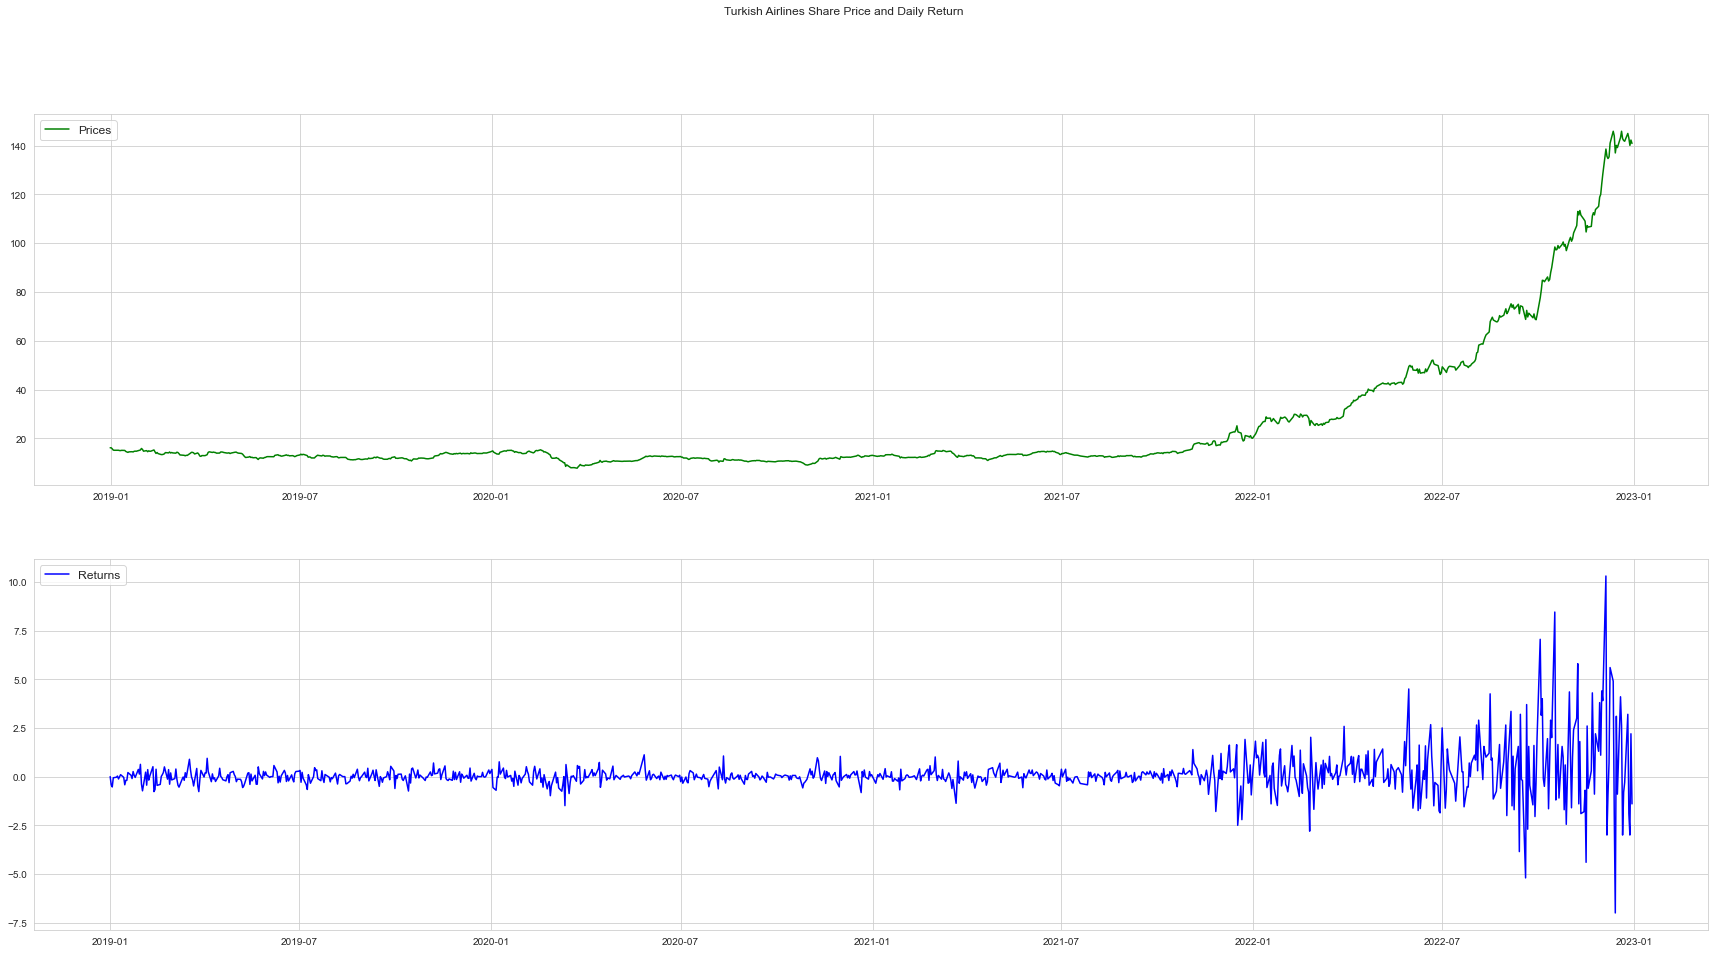

In [12]:
f, ax = plt.subplots(2, sharex=False, figsize=(30, 15))
f.suptitle("Turkish Airlines Share Price and Daily Return")

ax[0].plot(thy_stock["Price"], "g", label="Prices")
ax[0].legend(loc='upper left', fontsize="large")
ax[0].grid(True)

ax[1].plot(thy_stock["Return"], "b", label="Returns")
ax[1].legend(loc='upper left', fontsize="large")
ax[1].grid(True)

plt.show()

**PRICE > EMA10 :** Fiyatın, hisse senedinin 10 günlük eksponansiyel hareket ortalamasının üzerine çıkması alım sinyali olarak değerlendirilebilir.


**EMA10 > EMA30 :** Hisse senedinin 10 günlük eksponansiyel hareket ortalamasının 30 günlük eksponansiyel hareket ortalamasının üzerine çıkması, alım sinyali olarak değerlendirilebilir.


**MACD > MACDS :** MACD(Moving Average Convergence Divergence - Hareket Ortalamasının Yakınsaması Uzaksaması) indikatörü, 26 ve 12 günlük hareket ortalamalarının eksponansiyel değerleri arasındaki farktır. MACD indikatörünün 9 günkük eksponansiyel hareket ortalaması ise MACD Signal (MACDS) olarak adlandırılır. MACD'nin MACDS üzerine çıkması alım sinyali olarak değerlendirilebilir.

# FIRST ALGORITHMIC PROCESS

In [13]:
thy_stock["EMA10_ALG"] = TA.trend.EMAIndicator(thy_stock["Price"], window = 10).ema_indicator()

In [14]:
thy_stock["Buy_Stock_S1"] = np.where((thy_stock["Price"] > thy_stock["EMA10_ALG"]), 1, 0)
thy_stock["Sell_Stock_S1"] = np.where((thy_stock["Price"] < thy_stock["EMA10_ALG"]), 1, 0)
thy_stock["Buy_Stock_S1_Indicator"] = np.where(
    (thy_stock["Buy_Stock_S1"] > thy_stock["Buy_Stock_S1"].shift(1)), 1, 0)
thy_stock["Sell_Stock_S1_Indicator"] = np.where(
    (thy_stock["Sell_Stock_S1"] > thy_stock["Sell_Stock_S1"].shift(1)), 1, 0)

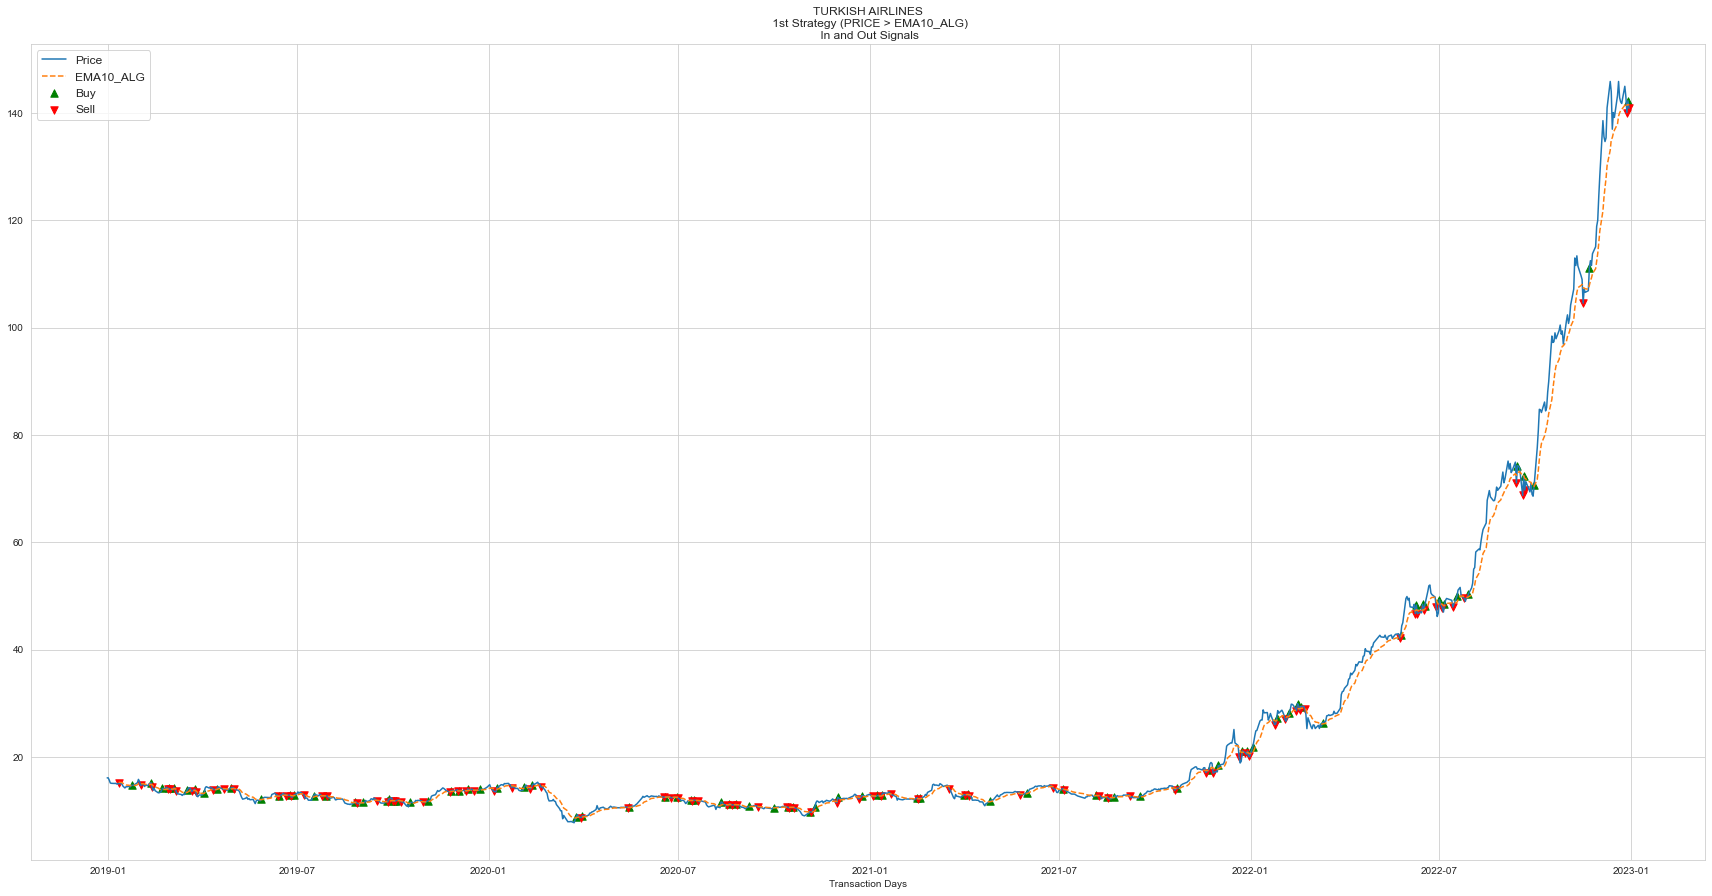

In [15]:
thy_stock["Date"] = thy_stock.index
fig1 = plt.figure(figsize=(30, 15))

plt.plot(thy_stock["Price"], label="Price")
plt.plot(thy_stock["EMA10_ALG"], label="EMA10_ALG", linestyle="--")

plt.scatter(thy_stock.loc[thy_stock["Buy_Stock_S1_Indicator"] == 1, "Date"].values,
            thy_stock.loc[thy_stock["Buy_Stock_S1_Indicator"] == 1, "Price"].values,
            label="Buy", color="green", s=55, marker="^")

plt.scatter(thy_stock.loc[thy_stock["Sell_Stock_S1_Indicator"] == 1, "Date"].values,
            thy_stock.loc[thy_stock["Sell_Stock_S1_Indicator"] == 1, "Price"].values,
            label="Sell", color="red", s=55, marker="v")

plt.xlabel("Transaction Days")
plt.legend(loc='upper left', fontsize="large")
# plt.savefig("THY_Signals.jpg", format="jpg", dpi=1200)
plt.title("TURKISH AIRLINES\n 1st Strategy (PRICE > EMA10_ALG)\n In and Out Signals")
plt.show()

In [16]:
thy_stock["Value_Stock_S1"] = 1000 * (
        1 + (np.where(thy_stock["Buy_Stock_S1"] == 1, 0.95 * thy_stock["Return_Percentage"], 0)).cumsum())

In [17]:
period_s1 = len(thy_stock)

highest_daily_losses_s1 = 100 * round(thy_stock["Return_Percentage"].min(), 2)
highest_daily_profit_s1 = 100 * round(thy_stock["Return_Percentage"].max(), 2)
standard_deviation_of_profit_s1 = 100 * round(thy_stock["Return_Percentage"].std(), 2)

total_potential_yield_s1 = 100 * round(
    sum(np.where((thy_stock["Return_Percentage"] > 0), thy_stock["Return_Percentage"], 0)), 2)

total_potential_loss_s1 = 100 * round(
    sum(np.where((thy_stock["Return_Percentage"] < 0), thy_stock["Return_Percentage"], 0)), 2)

exact_yield_s1 = 100 * thy_stock["Return_Percentage"].sum().round(2)
model_yield_s1 = 100 * sum(np.where((thy_stock["Buy_Stock_S1"] == 1), thy_stock["Return_Percentage"], 0))

model_loss_protection_s1 = 100 * sum(
    np.where((thy_stock["Sell_Stock_S1"] == 1), thy_stock["Return_Percentage"], 0).round(2))

stock_price_beginning_s1 = thy_stock["Price"][0].round(2)
stock_price_ending_s1 = thy_stock["Price"][-1].round(2)

beginning_ending_change_s1 = 100 * (
        (thy_stock["Price"][-1] - thy_stock["Price"][0]) / thy_stock["Price"][0].round(2))

model_captured_profit_s1 = 100 * (sum(
    np.where((thy_stock["Buy_Stock_S1"] == 1), thy_stock["Return_Percentage"], 0)) / sum(
    np.where((thy_stock["Return_Percentage"] > 0), thy_stock["Return_Percentage"], 0))).round(2)

final_price_s1 = thy_stock["Value_Stock_S1"][-1].round(2)

In [18]:
print("----------------------")
print("DESCRIPTIVE STATISTICS")
print("----------------------")

print(f"PERIOD: {period_s1} DAYS")
print(f"HIGHEST DAILY LOSSES: {highest_daily_losses_s1} %")
print(f"HIGHEST DAILY PROFIT: {highest_daily_profit_s1} %")
print(f"STANDARD DEVIATION OF PROFIT: {standard_deviation_of_profit_s1} %")
print(f"TOTAL POTENTIAL YIELD: {total_potential_yield_s1} %")
print(f"TOTAL POTENTIAL LOSS: {total_potential_loss_s1} %")
print(f"EXACT YIELD: {exact_yield_s1} %")
print("----------------------")
print(f"PERFORMANCE OF THE MODEL")
print("----------------------")
print(f"YIELD GENERATED BY MODEL: {model_yield_s1} %")
print(f"MODEL'S AMOUNT OF PROTECTION FROM FINANCIAL LOSS: {model_loss_protection_s1} %")

print("----------------------")
print("REPORT")
print("----------------------")
print(
    f"While the share price was {stock_price_beginning_s1} TL at the beginning of the period, the price at the end of the period was {stock_price_ending_s1} TL with a {beginning_ending_change_s1}% change. The model was able to capture {model_captured_profit_s1}% of the total positive return. The investment of 1000 TL at the beginning of the period became {final_price_s1} liras in {period_s1} days.")
print("----------------------")

----------------------
DESCRIPTIVE STATISTICS
----------------------
PERIOD: 1014 DAYS
HIGHEST DAILY LOSSES: -15.0 %
HIGHEST DAILY PROFIT: 10.0 %
STANDARD DEVIATION OF PROFIT: 3.0 %
TOTAL POTENTIAL YIELD: 1087.0 %
TOTAL POTENTIAL LOSS: -834.0 %
EXACT YIELD: 252.99999999999997 %
----------------------
PERFORMANCE OF THE MODEL
----------------------
YIELD GENERATED BY MODEL: 688.0750945925162 %
MODEL'S AMOUNT OF PROTECTION FROM FINANCIAL LOSS: -424.99999999999955 %
----------------------
REPORT
----------------------
While the share price was 16.1 TL at the beginning of the period, the price at the end of the period was 140.9 TL with a 775.1552392236933% change. The model was able to capture 63.0% of the total positive return. The investment of 1000 TL at the beginning of the period became 7536.71 liras in 1014 days.
----------------------


In [19]:
thy_stock["Date"] = thy_stock.index

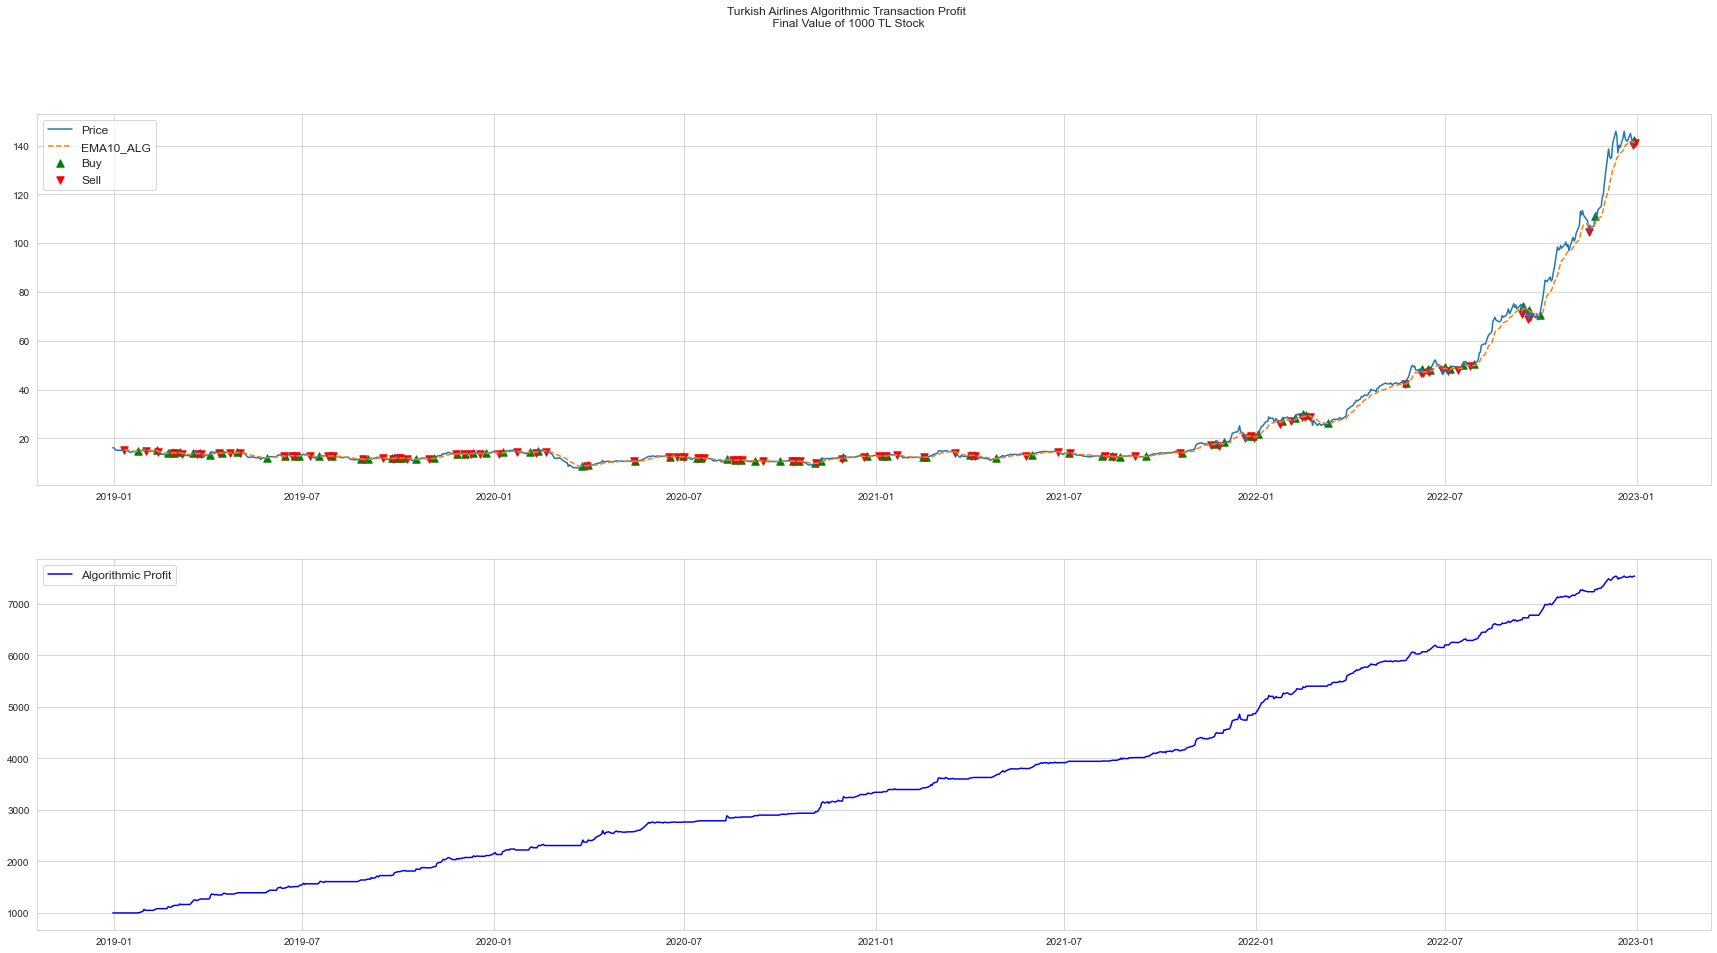

In [20]:
f, ax = plt.subplots(2, sharex="none", figsize=(30, 15))
f.suptitle("Turkish Airlines Algorithmic Transaction Profit\n Final Value of 1000 TL Stock")

ax[0].plot(thy_stock["Price"], label="Price")
ax[0].plot(thy_stock["EMA10_ALG"], label="EMA10_ALG", linestyle="--")

ax[0].scatter(thy_stock.loc[thy_stock["Buy_Stock_S1_Indicator"] == 1, "Date"].values,
              thy_stock.loc[thy_stock["Buy_Stock_S1_Indicator"] == 1, "Price"].values,
              label="Buy", color="green", s=55, marker="^")

ax[0].scatter(thy_stock.loc[thy_stock["Sell_Stock_S1_Indicator"] == 1, "Date"].values,
              thy_stock.loc[thy_stock["Sell_Stock_S1_Indicator"] == 1, "Price"].values,
              label="Sell", color="red", s=55, marker="v")

ax[0].legend(loc='upper left', fontsize="large")
ax[0].grid(True)

ax[1].plot(thy_stock["Value_Stock_S1"], "b", label="Algorithmic Profit")
ax[1].legend(loc='upper left', fontsize="large")
ax[1].grid(True)

plt.show()

***
***
***
# SECOND ALGORITHMIC PROCESS

In [21]:
thy_stock["EMA30_ALG"] = TA.trend.EMAIndicator(thy_stock["Price"], 30).ema_indicator()

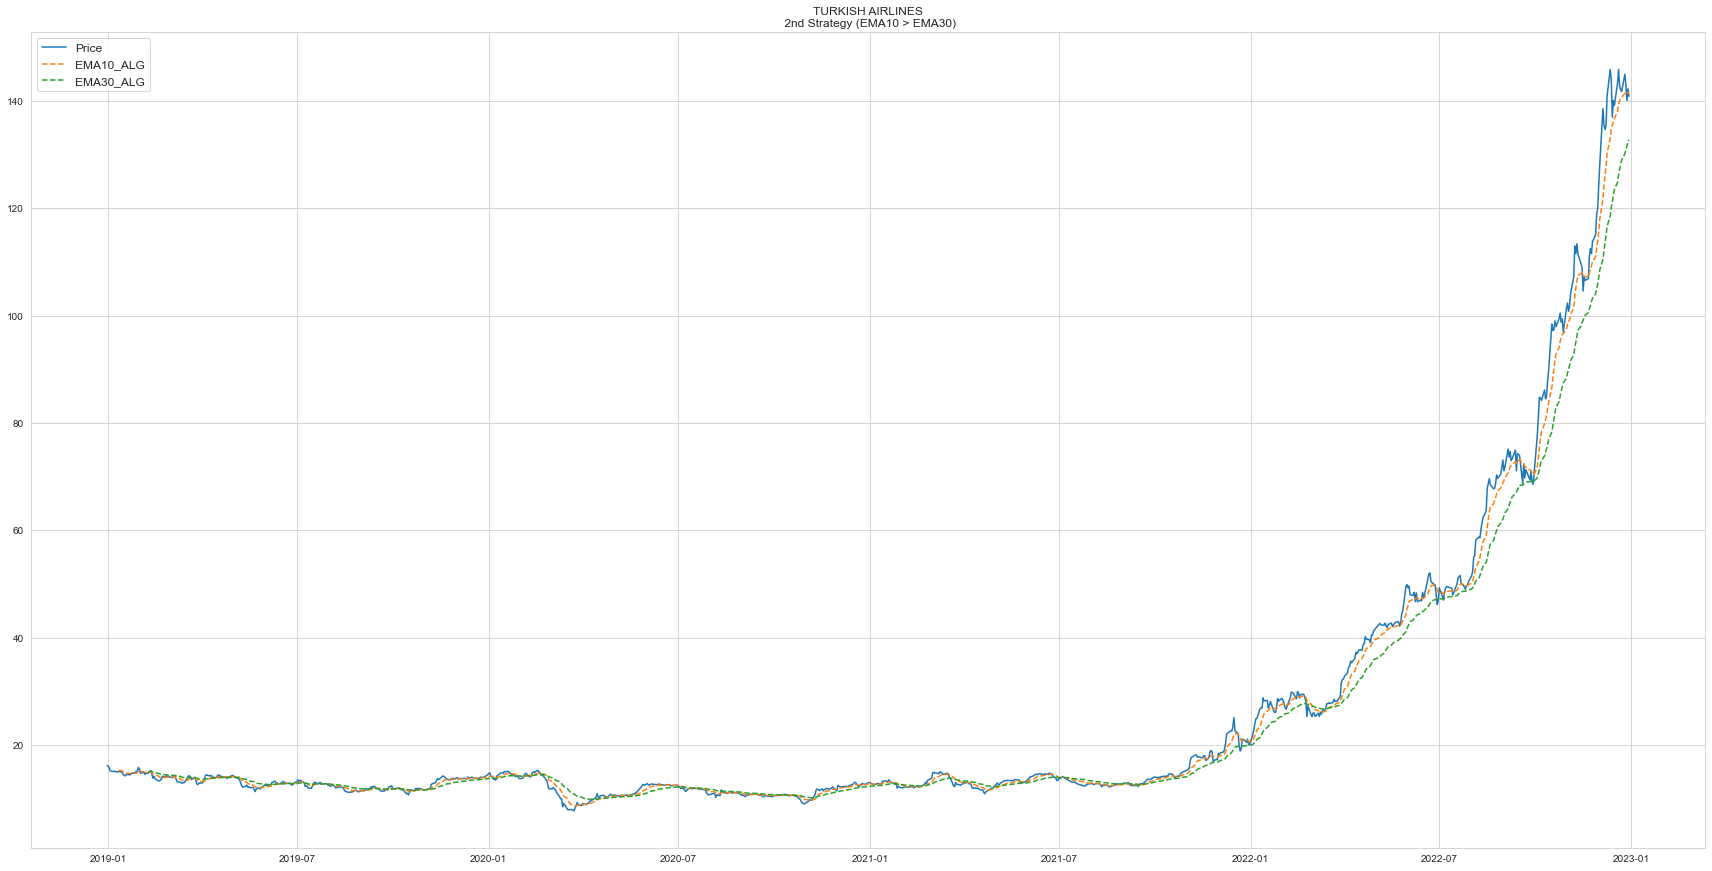

In [22]:
fig = plt.figure(figsize=(30, 15))
plt.plot(thy_stock["Price"], label="Price")
plt.plot(thy_stock["EMA10_ALG"], label="EMA10_ALG", linestyle="--")
plt.plot(thy_stock["EMA30_ALG"], label="EMA30_ALG", linestyle="--")
plt.legend(loc='upper left', fontsize="large")
plt.title("TURKISH AIRLINES\n 2nd Strategy (EMA10 > EMA30)")
plt.show()

In [23]:
thy_stock["Buy_Stock_S2"] = np.where((thy_stock["EMA10_ALG"] > thy_stock["EMA30_ALG"]), 1, 0)
thy_stock["Sell_Stock_S2"] = np.where((thy_stock["EMA10_ALG"] < thy_stock["EMA30_ALG"]), 1, 0)
thy_stock["Buy_Stock_S2_Indicator"] = np.where(
    (thy_stock["Buy_Stock_S2"] > thy_stock["Buy_Stock_S2"].shift(1)), 1, 0)
thy_stock["Sell_Stock_S2_Indicator"] = np.where(
    (thy_stock["Sell_Stock_S2"] > thy_stock["Sell_Stock_S2"].shift(1)), 1, 0)

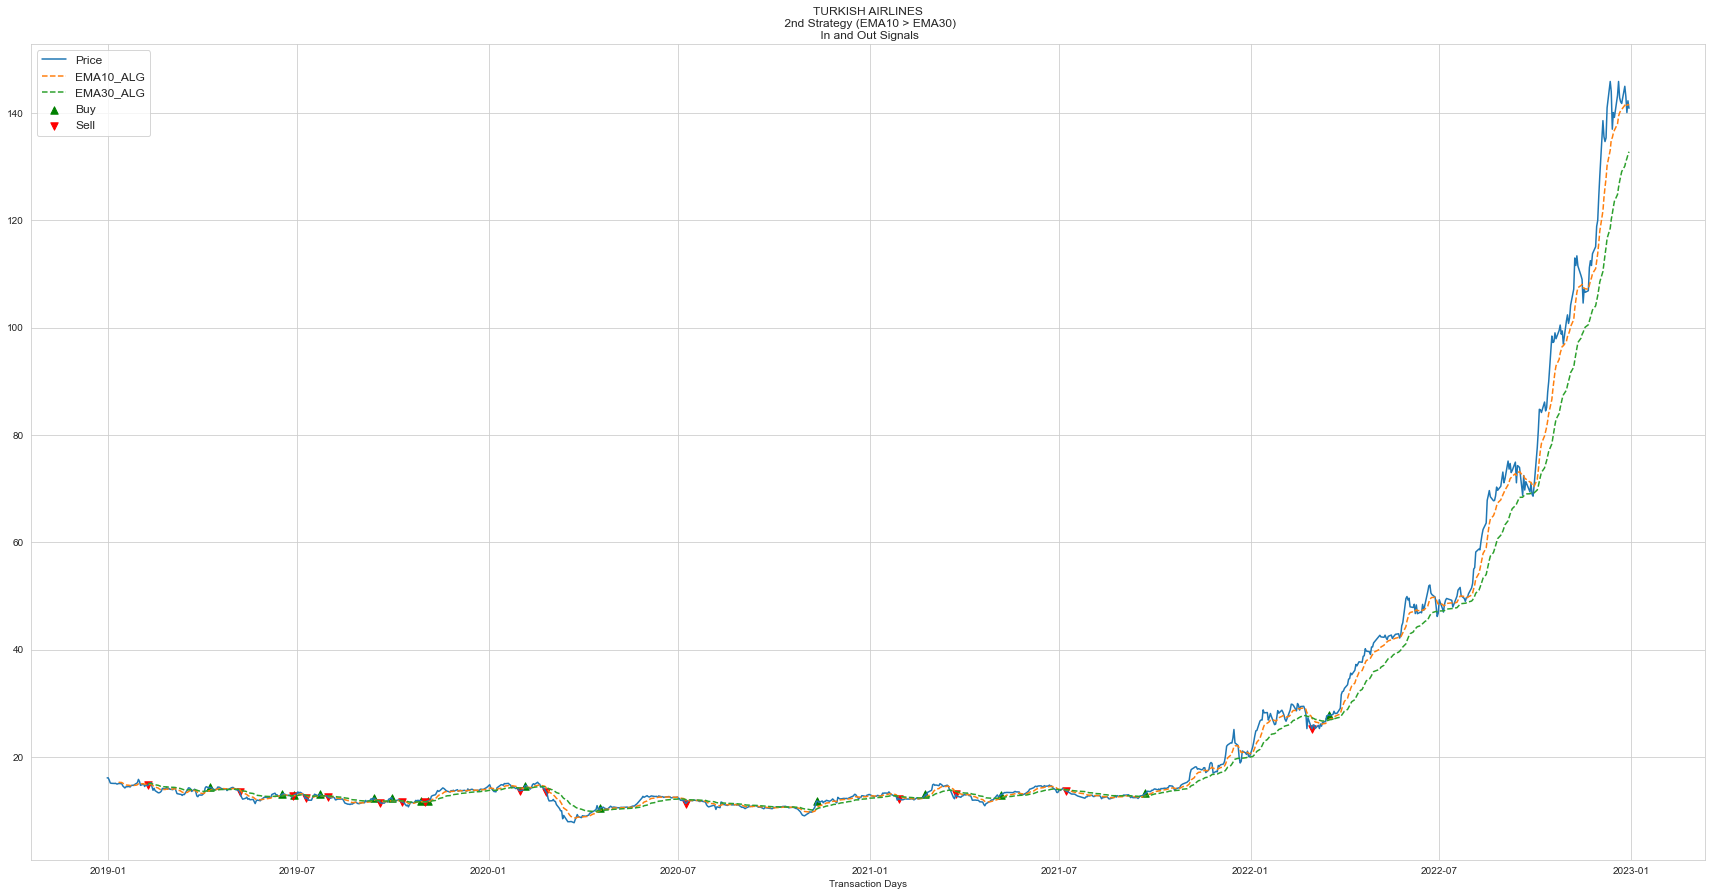

In [24]:
thy_stock["Date"] = thy_stock.index
fig1 = plt.figure(figsize=(30, 15))

plt.plot(thy_stock["Price"], label="Price")
plt.plot(thy_stock["EMA10_ALG"], label="EMA10_ALG", linestyle="--")
plt.plot(thy_stock["EMA30_ALG"], label="EMA30_ALG", linestyle="--")

plt.scatter(thy_stock.loc[thy_stock["Buy_Stock_S2_Indicator"] == 1, "Date"].values,
            thy_stock.loc[thy_stock["Buy_Stock_S2_Indicator"] == 1, "Price"].values,
            label="Buy", color="green", s=55, marker="^")

plt.scatter(thy_stock.loc[thy_stock["Sell_Stock_S2_Indicator"] == 1, "Date"].values,
            thy_stock.loc[thy_stock["Sell_Stock_S2_Indicator"] == 1, "Price"].values,
            label="Sell", color="red", s=55, marker="v")

plt.xlabel("Transaction Days")
plt.legend(loc='upper left', fontsize="large")
# plt.savefig("THY_Signals.jpg", format="jpg", dpi=1200)
plt.title("TURKISH AIRLINES\n 2nd Strategy (EMA10 > EMA30)\n In and Out Signals")
plt.show()

In [25]:
thy_stock["Value_Stock_S2"] = 1000 * (
        1 + (np.where(thy_stock["Buy_Stock_S2"] == 1, 0.95 * thy_stock["Return_Percentage"], 0)).cumsum())

In [26]:
period_s2 = len(thy_stock)

highest_daily_losses_s2 = 100 * round(thy_stock["Return_Percentage"].min(), 2)
highest_daily_profit_s2 = 100 * round(thy_stock["Return_Percentage"].max(), 2)
standard_deviation_of_profit_s2 = 100 * round(thy_stock["Return_Percentage"].std(), 2)

total_potential_yield_s2 = 100 * round(
    sum(np.where((thy_stock["Return_Percentage"] > 0), thy_stock["Return_Percentage"], 0)), 2)

total_potential_loss_s2 = 100 * round(
    sum(np.where((thy_stock["Return_Percentage"] < 0), thy_stock["Return_Percentage"], 0)), 2)

exact_yield_s2 = 100 * thy_stock["Return_Percentage"].sum().round(2)
model_yield_s2 = 100 * sum(np.where((thy_stock["Buy_Stock_S2"] == 1), thy_stock["Return_Percentage"], 0))

model_loss_protection_s2 = 100 * sum(
    np.where((thy_stock["Sell_Stock_S2"] == 1), thy_stock["Return_Percentage"], 0).round(2))

stock_price_beginning_s2 = thy_stock["Price"][0].round(2)
stock_price_ending_s2 = thy_stock["Price"][-1].round(2)

beginning_ending_change_s2 = 100 * (
        (thy_stock["Price"][-1] - thy_stock["Price"][0]) / thy_stock["Price"][0].round(2))

model_captured_profit_s2 = 100 * (sum(
    np.where((thy_stock["Buy_Stock_S2"] == 1), thy_stock["Return_Percentage"], 0)) / sum(
    np.where((thy_stock["Return_Percentage"] > 0), thy_stock["Return_Percentage"], 0))).round(2)

final_price_s2 = thy_stock["Value_Stock_S2"][-1].round(2)

In [27]:
print("----------------------")
print("DESCRIPTIVE STATISTICS")
print("----------------------")

print(f"PERIOD: {period_s2} DAYS")
print(f"HIGHEST DAILY LOSSES: {highest_daily_losses_s2} %")
print(f"HIGHEST DAILY PROFIT: {highest_daily_profit_s2} %")
print(f"STANDARD DEVIATION OF PROFIT: {standard_deviation_of_profit_s2} %")
print(f"TOTAL POTENTIAL YIELD: {total_potential_yield_s2} %")
print(f"TOTAL POTENTIAL LOSS: {total_potential_loss_s2} %")
print(f"EXACT YIELD: {exact_yield_s2} %")
print("----------------------")
print(f"PERFORMANCE OF THE MODEL")
print("----------------------")
print(f"YIELD GENERATED BY MODEL: {model_yield_s2} %")
print(f"MODEL'S AMOUNT OF PROTECTION FROM FINANCIAL LOSS: {model_loss_protection_s2} %")

print("----------------------")
print("REPORT")
print("----------------------")
print(
    f"While the share price was {stock_price_beginning_s2} TL at the beginning of the period, the price at the end of the period was {stock_price_ending_s2} TL with a {beginning_ending_change_s2}% change. The model was able to capture {model_captured_profit_s2}% of the total positive return. The investment of 1000 TL at the beginning of the period became {final_price_s2} liras in {period_s2} days.")
print("----------------------")

----------------------
DESCRIPTIVE STATISTICS
----------------------
PERIOD: 1014 DAYS
HIGHEST DAILY LOSSES: -15.0 %
HIGHEST DAILY PROFIT: 10.0 %
STANDARD DEVIATION OF PROFIT: 3.0 %
TOTAL POTENTIAL YIELD: 1087.0 %
TOTAL POTENTIAL LOSS: -834.0 %
EXACT YIELD: 252.99999999999997 %
----------------------
PERFORMANCE OF THE MODEL
----------------------
YIELD GENERATED BY MODEL: 274.6721573084933 %
MODEL'S AMOUNT OF PROTECTION FROM FINANCIAL LOSS: -2.3592239273284576e-14 %
----------------------
REPORT
----------------------
While the share price was 16.1 TL at the beginning of the period, the price at the end of the period was 140.9 TL with a 775.1552392236933% change. The model was able to capture 25.0% of the total positive return. The investment of 1000 TL at the beginning of the period became 3609.39 liras in 1014 days.
----------------------


In [28]:
thy_stock["Date"] = thy_stock.index

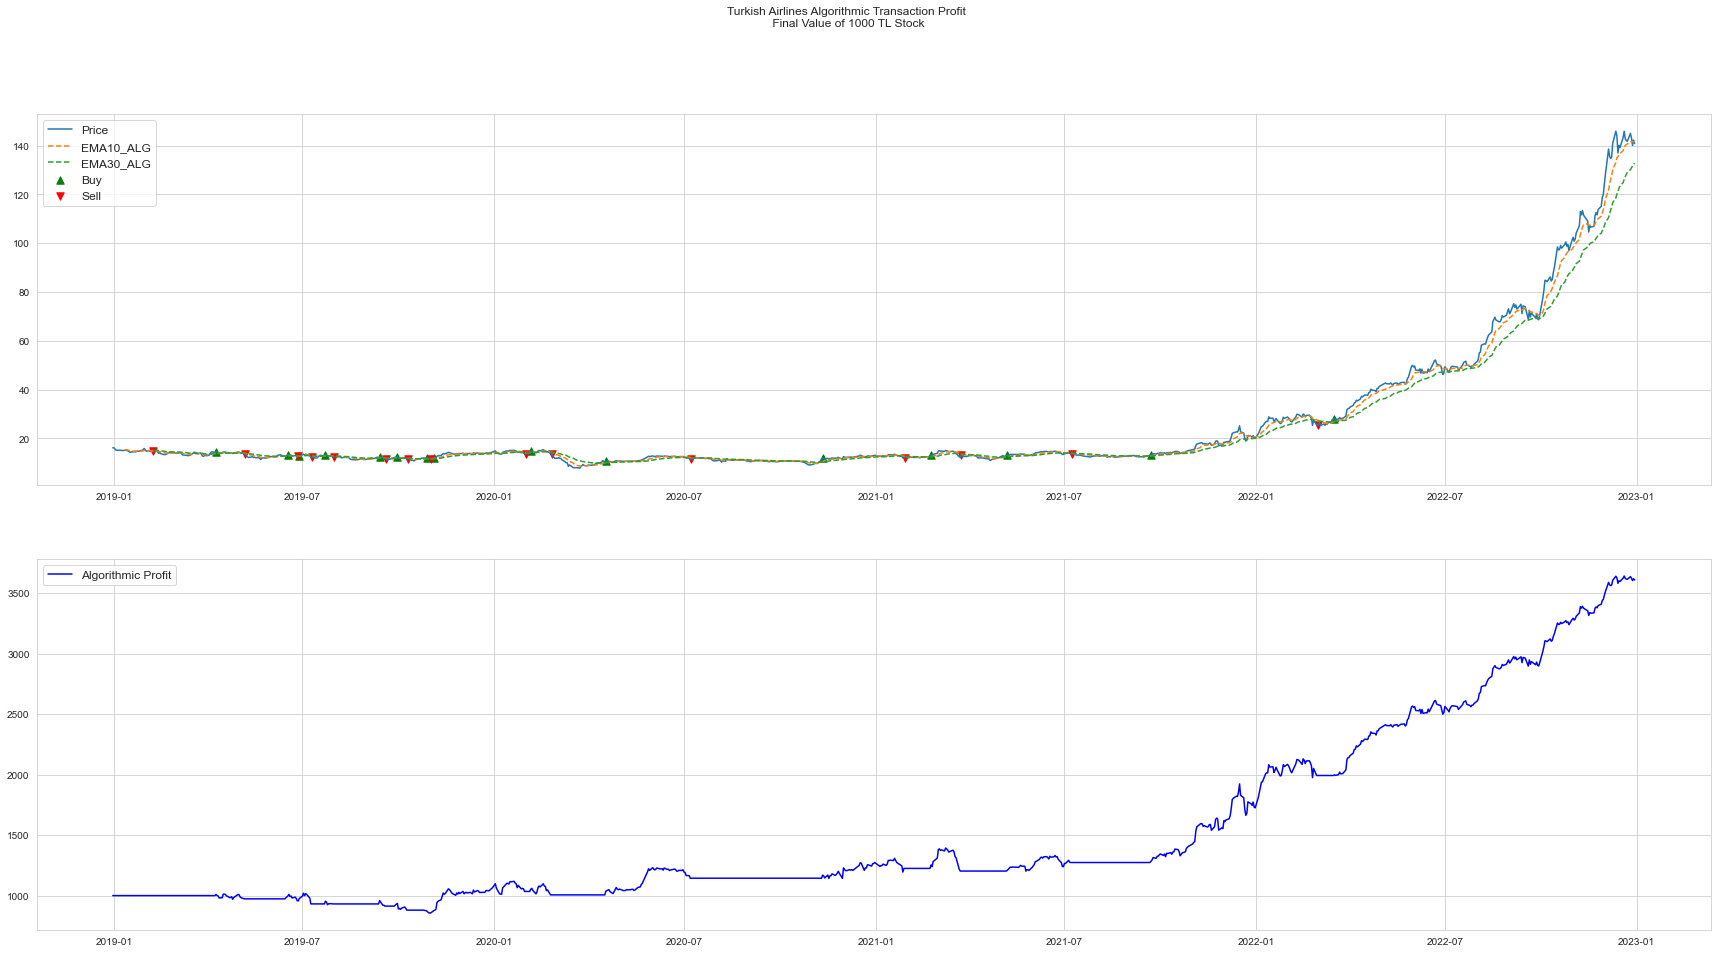

In [29]:
f, axarr = plt.subplots(2, sharex="none", figsize=(30, 15))
f.suptitle("Turkish Airlines Algorithmic Transaction Profit\n Final Value of 1000 TL Stock")

axarr[0].plot(thy_stock["Price"], label="Price")
axarr[0].plot(thy_stock["EMA10_ALG"], label="EMA10_ALG", linestyle="--")
axarr[0].plot(thy_stock["EMA30_ALG"], label="EMA30_ALG", linestyle="--")

axarr[0].scatter(thy_stock.loc[thy_stock["Buy_Stock_S2_Indicator"] == 1, "Date"].values,
                 thy_stock.loc[thy_stock["Buy_Stock_S2_Indicator"] == 1, "Price"].values,
                 label="Buy", color="green", s=55, marker="^")

axarr[0].scatter(thy_stock.loc[thy_stock["Sell_Stock_S2_Indicator"] == 1, "Date"].values,
                 thy_stock.loc[thy_stock["Sell_Stock_S2_Indicator"] == 1, "Price"].values,
                 label="Sell", color="red", s=55, marker="v")

axarr[0].legend(loc='upper left', fontsize="large")
ax[0].grid(True)

axarr[1].plot(thy_stock["Value_Stock_S2"], "b", label="Algorithmic Profit")
axarr[1].legend(loc='upper left', fontsize="large")
axarr[1].grid(True)

plt.show()

***
***
***
# THIRD ALGORITHMIC PROCESS

In [30]:
thy_stock["MACD_ALG"] = TA.trend.macd(thy_stock["Price"], window_fast=12, window_slow=26, fillna=False)
thy_stock["MACDS_ALG"] = TA.trend.macd_signal(thy_stock["Price"], window_fast=12, window_slow=26, window_sign=9,
                                              fillna=False)

In [31]:
thy_stock["Buy_Stock_S3"] = np.where((thy_stock["MACD_ALG"] > thy_stock["MACDS_ALG"]), 1, 0)
thy_stock["Sell_Stock_S3"] = np.where((thy_stock["MACD_ALG"] < thy_stock["MACDS_ALG"]), 1, 0)
thy_stock["Buy_Stock_S3_Indicator"] = np.where(
    (thy_stock["Buy_Stock_S3"] > thy_stock["Buy_Stock_S3"].shift(1)), 1, 0)
thy_stock["Sell_Stock_S3_Indicator"] = np.where(
    (thy_stock["Sell_Stock_S3"] > thy_stock["Sell_Stock_S3"].shift(1)), 1, 0)

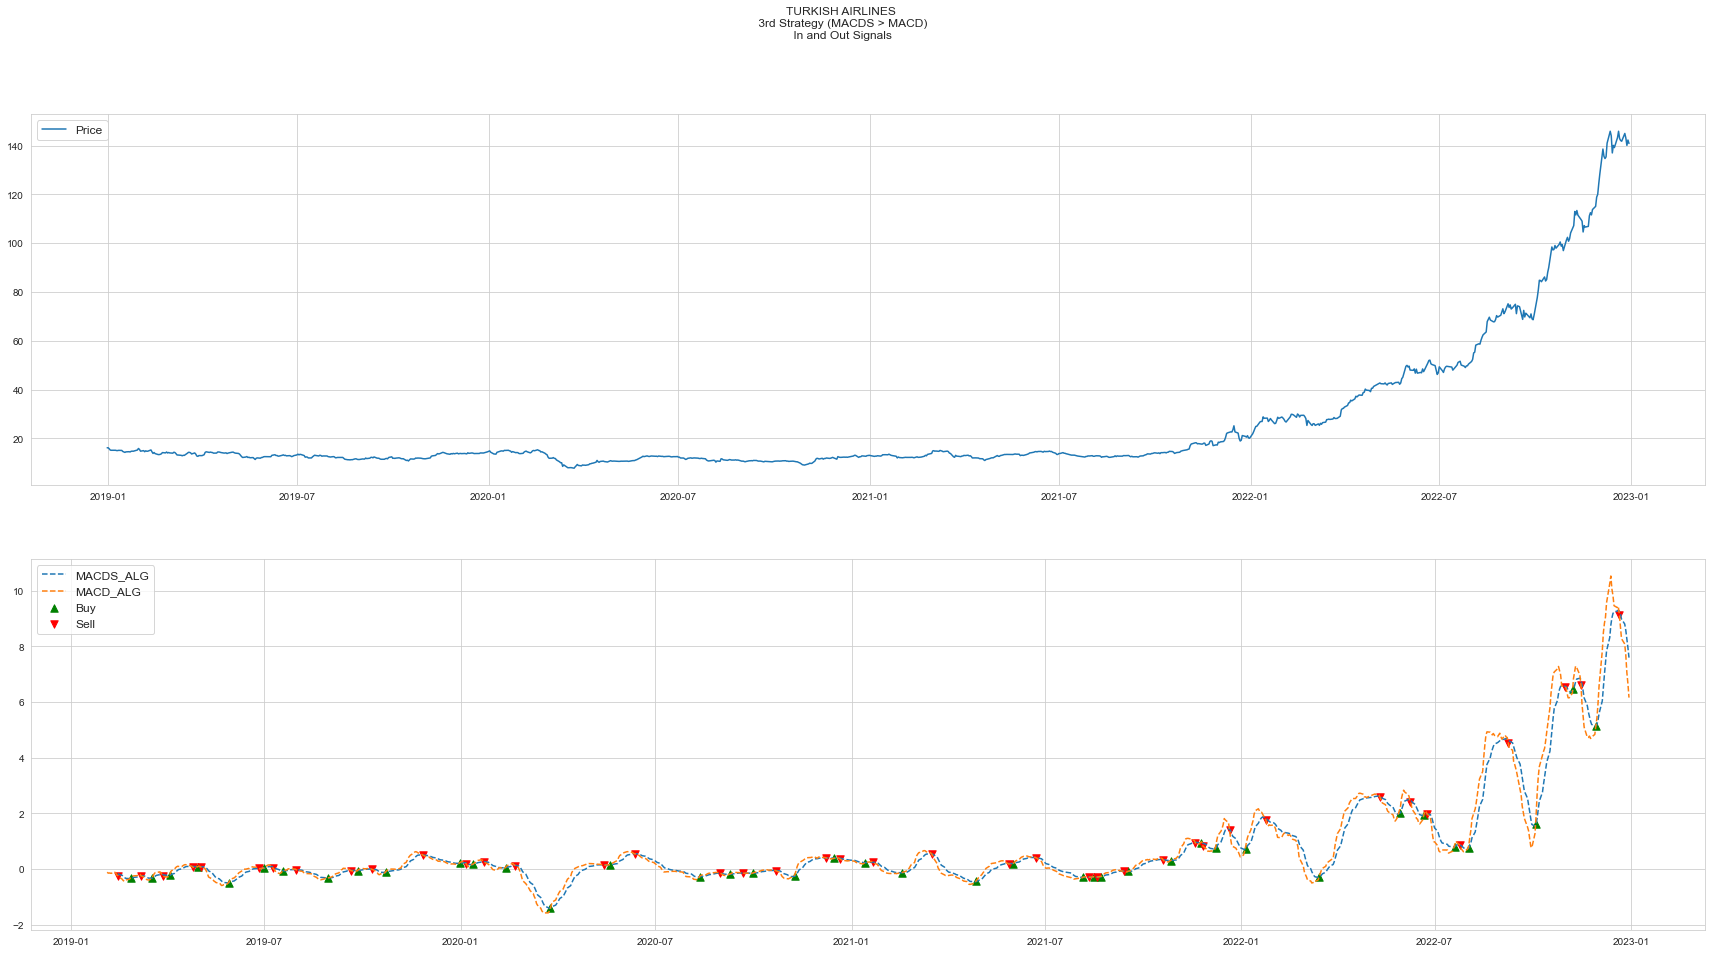

In [32]:
f, ax_s3 = plt.subplots(2, sharex="none", figsize=(30, 15))
f.suptitle("TURKISH AIRLINES\n 3rd Strategy (MACDS > MACD)\n In and Out Signals")

ax_s3[0].plot(thy_stock["Price"], label="Price")
ax_s3[0].legend(loc='upper left', fontsize="large")
ax_s3[0].grid(True)

ax_s3[1].plot(thy_stock["MACDS_ALG"], label="MACDS_ALG", linestyle="--")
ax_s3[1].plot(thy_stock["MACD_ALG"], label="MACD_ALG", linestyle="--")

ax_s3[1].scatter(thy_stock.loc[thy_stock["Buy_Stock_S3_Indicator"] == 1, "Date"].values,
                 thy_stock.loc[thy_stock["Buy_Stock_S3_Indicator"] == 1, "MACDS_ALG"].values,
                 label="Buy", color="green", s=55, marker="^")

ax_s3[1].scatter(thy_stock.loc[thy_stock["Sell_Stock_S3_Indicator"] == 1, "Date"].values,
                 thy_stock.loc[thy_stock["Sell_Stock_S3_Indicator"] == 1, "MACD_ALG"].values,
                 label="Sell", color="red", s=55, marker="v")

ax_s3[1].legend(loc='upper left', fontsize="large")
ax_s3[1].grid(True)

plt.show()

In [33]:
thy_stock["Value_Stock_S3"] = 1000 * (
        1 + (np.where(thy_stock["Buy_Stock_S3"] == 1, 0.95 * thy_stock["Return_Percentage"], 0)).cumsum())

In [34]:
period_s3 = len(thy_stock)

highest_daily_losses_s3 = 100 * round(thy_stock["Return_Percentage"].min(), 2)
highest_daily_profit_s3 = 100 * round(thy_stock["Return_Percentage"].max(), 2)
standard_deviation_of_profit_s3 = 100 * round(thy_stock["Return_Percentage"].std(), 2)

total_potential_yield_s3 = 100 * round(
    sum(np.where((thy_stock["Return_Percentage"] > 0), thy_stock["Return_Percentage"], 0)), 2)

total_potential_loss_s3 = 100 * round(
    sum(np.where((thy_stock["Return_Percentage"] < 0), thy_stock["Return_Percentage"], 0)), 2)

exact_yield_s3 = 100 * thy_stock["Return_Percentage"].sum().round(2)
model_yield_s3 = 100 * sum(np.where((thy_stock["Buy_Stock_S3"] == 1), thy_stock["Return_Percentage"], 0))

model_loss_protection_s3 = 100 * sum(
    np.where((thy_stock["Sell_Stock_S3"] == 1), thy_stock["Return_Percentage"], 0).round(2))

stock_price_beginning_s3 = thy_stock["Price"][0].round(2)
stock_price_ending_s3 = thy_stock["Price"][-1].round(2)

beginning_ending_change_s3 = 100 * (
        (thy_stock["Price"][-1] - thy_stock["Price"][0]) / thy_stock["Price"][0].round(2))

model_captured_profit_s3 = 100 * (sum(
    np.where((thy_stock["Buy_Stock_S3"] == 1), thy_stock["Return_Percentage"], 0)) / sum(
    np.where((thy_stock["Return_Percentage"] > 0), thy_stock["Return_Percentage"], 0))).round(2)

final_price_s3 = thy_stock["Value_Stock_S3"][-1].round(2)

In [35]:
print("----------------------")
print("DESCRIPTIVE STATISTICS")
print("----------------------")

print(f"PERIOD: {period_s3} DAYS")
print(f"HIGHEST DAILY LOSSES: {highest_daily_losses_s3} %")
print(f"HIGHEST DAILY PROFIT: {highest_daily_profit_s3} %")
print(f"STANDARD DEVIATION OF PROFIT: {standard_deviation_of_profit_s3} %")
print(f"TOTAL POTENTIAL YIELD: {total_potential_yield_s3} %")
print(f"TOTAL POTENTIAL LOSS: {total_potential_loss_s3} %")
print(f"EXACT YIELD: {exact_yield_s3} %")
print("----------------------")
print(f"PERFORMANCE OF THE MODEL")
print("----------------------")
print(f"YIELD GENERATED BY MODEL: {model_yield_s3} %")
print(f"MODEL'S AMOUNT OF PROTECTION FROM FINANCIAL LOSS: {model_loss_protection_s3} %")

print("----------------------")
print("REPORT")
print("----------------------")
print(
    f"While the share price was {stock_price_beginning_s3} TL at the beginning of the period, the price at the end of the period was {stock_price_ending_s3} TL with a {beginning_ending_change_s3}% change. The model was able to capture {model_captured_profit_s3}% of the total positive return. The investment of 1000 TL at the beginning of the period became {final_price_s3} liras in {period_s3} days.")
print("----------------------")

----------------------
DESCRIPTIVE STATISTICS
----------------------
PERIOD: 1014 DAYS
HIGHEST DAILY LOSSES: -15.0 %
HIGHEST DAILY PROFIT: 10.0 %
STANDARD DEVIATION OF PROFIT: 3.0 %
TOTAL POTENTIAL YIELD: 1087.0 %
TOTAL POTENTIAL LOSS: -834.0 %
EXACT YIELD: 252.99999999999997 %
----------------------
PERFORMANCE OF THE MODEL
----------------------
YIELD GENERATED BY MODEL: 341.73025866376514 %
MODEL'S AMOUNT OF PROTECTION FROM FINANCIAL LOSS: -73.00000000000003 %
----------------------
REPORT
----------------------
While the share price was 16.1 TL at the beginning of the period, the price at the end of the period was 140.9 TL with a 775.1552392236933% change. The model was able to capture 31.0% of the total positive return. The investment of 1000 TL at the beginning of the period became 4246.44 liras in 1014 days.
----------------------


In [36]:
thy_stock["Date"] = thy_stock.index

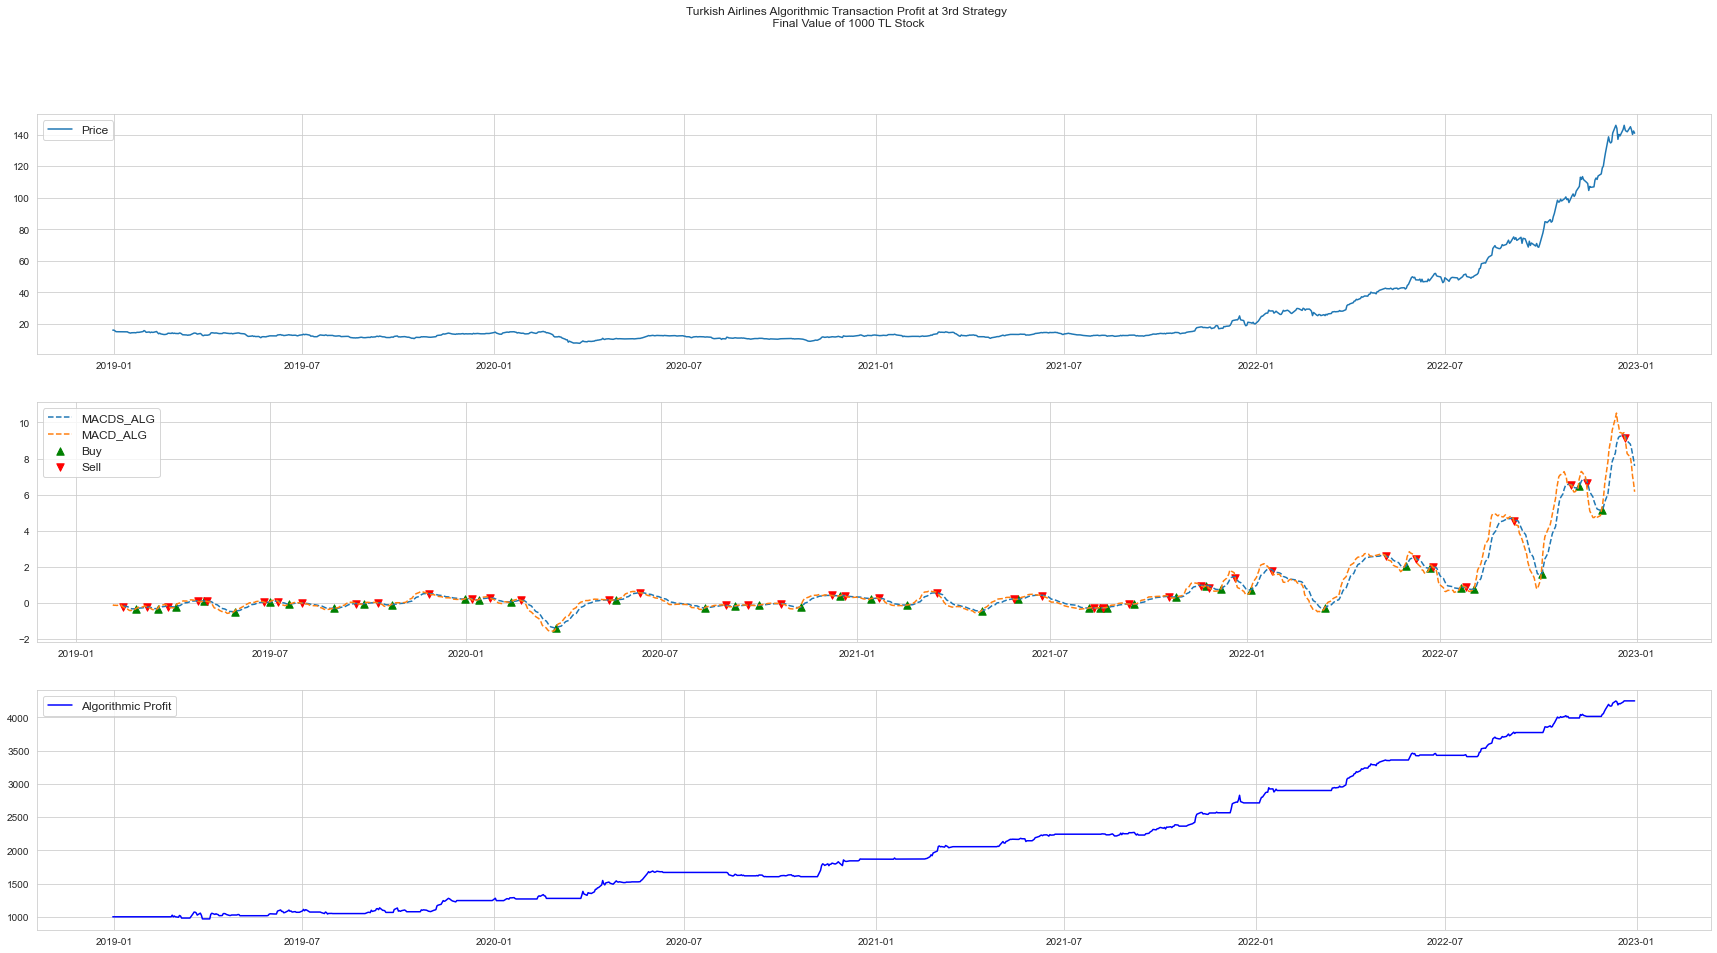

In [37]:
f, ax_s3 = plt.subplots(3, sharex="none", figsize=(30, 15))
f.suptitle("Turkish Airlines Algorithmic Transaction Profit at 3rd Strategy\n Final Value of 1000 TL Stock")

ax_s3[0].plot(thy_stock["Price"], label="Price")
ax_s3[0].legend(loc='upper left', fontsize="large")
ax[0].grid(True)

ax_s3[1].plot(thy_stock["MACDS_ALG"], label="MACDS_ALG", linestyle="--")
ax_s3[1].plot(thy_stock["MACD_ALG"], label="MACD_ALG", linestyle="--")

ax_s3[1].scatter(thy_stock.loc[thy_stock["Buy_Stock_S3_Indicator"] == 1, "Date"].values,
                 thy_stock.loc[thy_stock["Buy_Stock_S3_Indicator"] == 1, "MACDS_ALG"].values,
                 label="Buy", color="green", s=55, marker="^")

ax_s3[1].scatter(thy_stock.loc[thy_stock["Sell_Stock_S3_Indicator"] == 1, "Date"].values,
                 thy_stock.loc[thy_stock["Sell_Stock_S3_Indicator"] == 1, "MACD_ALG"].values,
                 label="Sell", color="red", s=55, marker="v")

ax_s3[1].legend(loc='upper left', fontsize="large")
ax[1].grid(True)

ax_s3[2].plot(thy_stock["Value_Stock_S3"], "b", label="Algorithmic Profit")
ax_s3[2].legend(loc='upper left', fontsize="large")
ax_s3[2].grid(True)

plt.show()

***
***
***
# DEMOCRATIC SELECTION

In [38]:
thy_stock["Buy_Stock_S4"] = np.where((thy_stock["Buy_Stock_S1"] + thy_stock["Buy_Stock_S2"] + thy_stock["Buy_Stock_S3"]) == 2, 1, 0)
thy_stock["Sell_Stock_S4"] = np.where((thy_stock["Sell_Stock_S1"] + thy_stock["Sell_Stock_S2"] + thy_stock["Sell_Stock_S3"]) == 2, 1, 0)
thy_stock["Buy_Stock_S4_Indicator"] = np.where(
    (thy_stock["Buy_Stock_S4"] > thy_stock["Buy_Stock_S4"].shift(1)), 1, 0)
thy_stock["Sell_Stock_S4_Indicator"] = np.where(
    (thy_stock["Sell_Stock_S4"] > thy_stock["Sell_Stock_S4"].shift(1)), 1, 0)

In [39]:
thy_stock["Value_Stock_S4"] = 1000 * (
        1 + (np.where(thy_stock["Buy_Stock_S4"] == 1, 0.95 * thy_stock["Return_Percentage"], 0)).cumsum())

In [40]:
period_s4 = len(thy_stock)

highest_daily_losses_s4 = 100 * round(thy_stock["Return_Percentage"].min(), 2)
highest_daily_profit_s4 = 100 * round(thy_stock["Return_Percentage"].max(), 2)
standard_deviation_of_profit_s4 = 100 * round(thy_stock["Return_Percentage"].std(), 2)

total_potential_yield_s4 = 100 * round(
    sum(np.where((thy_stock["Return_Percentage"] > 0), thy_stock["Return_Percentage"], 0)), 2)

total_potential_loss_s4 = 100 * round(
    sum(np.where((thy_stock["Return_Percentage"] < 0), thy_stock["Return_Percentage"], 0)), 2)

exact_yield_s4 = 100 * thy_stock["Return_Percentage"].sum().round(2)
model_yield_s4 = 100 * sum(np.where((thy_stock["Buy_Stock_S4"] == 1), thy_stock["Return_Percentage"], 0))

model_loss_protection_s4 = 100 * sum(
    np.where((thy_stock["Sell_Stock_S4"] == 1), thy_stock["Return_Percentage"], 0).round(2))

stock_price_beginning_s4 = thy_stock["Price"][0].round(2)
stock_price_ending_s4 = thy_stock["Price"][-1].round(2)

beginning_ending_change_s4 = 100 * (
        (thy_stock["Price"][-1] - thy_stock["Price"][0]) / thy_stock["Price"][0].round(2))

model_captured_profit_s4 = 100 * (sum(
    np.where((thy_stock["Buy_Stock_S4"] == 1), thy_stock["Return_Percentage"], 0)) / sum(
    np.where((thy_stock["Return_Percentage"] > 0), thy_stock["Return_Percentage"], 0))).round(2)

final_price_s4 = thy_stock["Value_Stock_S4"][-1].round(2)

In [41]:
print("----------------------")
print("DESCRIPTIVE STATISTICS")
print("----------------------")

print(f"PERIOD: {period_s4} DAYS")
print(f"HIGHEST DAILY LOSSES: {highest_daily_losses_s4} %")
print(f"HIGHEST DAILY PROFIT: {highest_daily_profit_s4} %")
print(f"STANDARD DEVIATION OF PROFIT: {standard_deviation_of_profit_s4} %")
print(f"TOTAL POTENTIAL YIELD: {total_potential_yield_s4} %")
print(f"TOTAL POTENTIAL LOSS: {total_potential_loss_s4} %")
print(f"EXACT YIELD: {exact_yield_s4} %")
print("----------------------")
print(f"PERFORMANCE OF THE MODEL")
print("----------------------")
print(f"YIELD GENERATED BY MODEL: {model_yield_s4} %")
print(f"MODEL'S AMOUNT OF PROTECTION FROM FINANCIAL LOSS: {model_loss_protection_s4} %")

print("----------------------")
print("REPORT")
print("----------------------")
print(
    f"While the share price was {stock_price_beginning_s4} TL at the beginning of the period, the price at the end of the period was {stock_price_ending_s4} TL with a {beginning_ending_change_s4}% change. The model was able to capture {model_captured_profit_s4}% of the total positive return. The investment of 1000 TL at the beginning of the period became {final_price_s4} liras in {period_s4} days.")
print("----------------------")

----------------------
DESCRIPTIVE STATISTICS
----------------------
PERIOD: 1014 DAYS
HIGHEST DAILY LOSSES: -15.0 %
HIGHEST DAILY PROFIT: 10.0 %
STANDARD DEVIATION OF PROFIT: 3.0 %
TOTAL POTENTIAL YIELD: 1087.0 %
TOTAL POTENTIAL LOSS: -834.0 %
EXACT YIELD: 252.99999999999997 %
----------------------
PERFORMANCE OF THE MODEL
----------------------
YIELD GENERATED BY MODEL: 271.92747741121303 %
MODEL'S AMOUNT OF PROTECTION FROM FINANCIAL LOSS: -191.0000000000001 %
----------------------
REPORT
----------------------
While the share price was 16.1 TL at the beginning of the period, the price at the end of the period was 140.9 TL with a 775.1552392236933% change. The model was able to capture 25.0% of the total positive return. The investment of 1000 TL at the beginning of the period became 3583.31 liras in 1014 days.
----------------------


***
***
***
# DECISION TREE

In [42]:
thy_stock["Target_Class_DT"] = np.where(thy_stock["Return"] > 0, 1, 0)

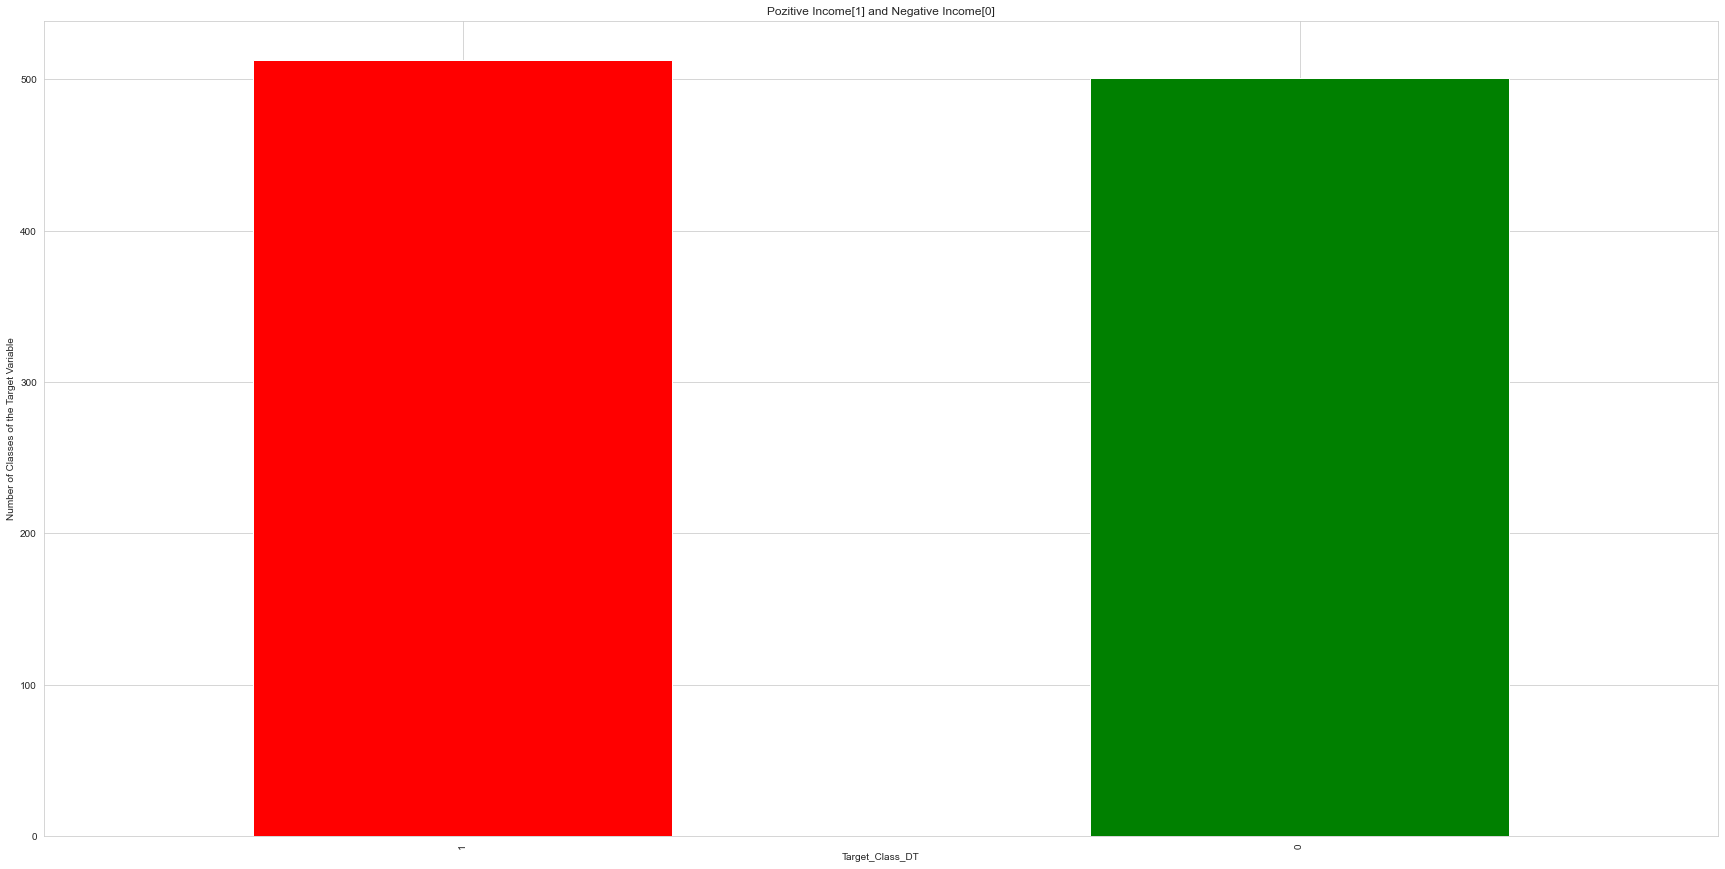

In [43]:
counter = thy_stock.value_counts(thy_stock["Target_Class_DT"], sort=True)
plt.figure(figsize=(30, 15))
counter.plot(kind="bar", color=["red", "green"])
plt.title("Pozitive Income[1] and Negative Income[0]")
plt.ylabel("Number of Classes of the Target Variable")
plt.show()

In [44]:
sum_of_positive_incomes = sum(i for i in thy_stock["Return"] if i > 0)
sum_of_negative_incomes = sum(i for i in thy_stock["Return"] if i < 0)

print(f"Sum of Positive Incomes: {sum_of_positive_incomes} TL")
print(f"Sum of Negative Incomes: {sum_of_negative_incomes} TL")

Sum of Positive Incomes: 323.20002698898315 TL
Sum of Negative Incomes: -198.4000334739685 TL


In [45]:
min_profit = thy_stock["Return"].min()
max_profit = thy_stock["Return"].max()
std_profit = thy_stock["Return"].std()

print(f"Min Profit of Stock: {min_profit} TL")
print(f"Max Profit of Stock: {max_profit} TL")
print(f"Standard Deviation of Stock: {min_profit} TL")

Min Profit of Stock: -7.0 TL
Max Profit of Stock: 10.300003051757812 TL
Standard Deviation of Stock: -7.0 TL


In [46]:
thy_stock["EMA10_DT"] = TA.trend.EMAIndicator(thy_stock["Price"], 10, fillna=False).ema_indicator()
thy_stock["EMA30_DT"] = TA.trend.EMAIndicator(thy_stock["Price"], 30, fillna=False).ema_indicator()
thy_stock["MACD_DT"] = TA.trend.macd(thy_stock["Price"], window_fast=12, window_slow=26, fillna=False)
thy_stock["MACDS_DT"] = TA.trend.macd_signal(thy_stock["Price"], window_fast=12, window_slow=26, window_sign=9,
                                           fillna=False)

In [47]:
thy_stock

,Open,High,Low,Close,Price,Volume,Return,Return_Percentage,EMA10_ALG,Buy_Stock_S1,...,Buy_Stock_S4,Sell_Stock_S4,Buy_Stock_S4_Indicator,Sell_Stock_S4_Indicator,Value_Stock_S4,Target_Class_DT,EMA10_DT,EMA30_DT,MACD_DT,MACDS_DT
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,16.059999,16.129999,15.910000,16.100000,16.100000,12553160,NaN,NaN,NaN,0,...,0,0,0,0,1000.000000,0,NaN,NaN,NaN,NaN
2019-01-01,16.100000,16.100000,16.100000,16.100000,16.100000,0,0.000000,0.000000,NaN,0,...,0,0,0,0,1000.000000,0,NaN,NaN,NaN,NaN
2019-01-02,16.129999,16.250000,15.650000,15.680000,15.680000,48650466,-0.420000,-0.026087,NaN,0,...,0,0,0,0,1000.000000,0,NaN,NaN,NaN,NaN
2019-01-03,15.610000,16.000000,15.090000,15.150000,15.150000,60474927,-0.530001,-0.033801,NaN,0,...,0,0,0,0,1000.000000,0,NaN,NaN,NaN,NaN
2019-01-04,15.350000,15.450000,14.820000,15.090000,15.090000,51431175,-0.059999,-0.003960,NaN,0,...,0,0,0,0,1000.000000,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,143.300003,145.300003,142.800003,145.000000,145.000000,43689692,3.199997,0.022567,141.463703,1,...,1,0,0,0,3580.841377,1,141.463703,130.127294,8.083939,8.799260
2022-12-27,145.199997,146.600006,143.000000,143.100006,143.100006,63253933,-1.899994,-0.013103,141.761212,1,...,1,0,0,0,3568.393141,0,141.761212,130.964243,7.693351,8.578078
2022-12-28,143.500000,143.800003,137.100006,140.100006,140.100006,48565337,-3.000000,-0.020964,141.459175,0,...,0,1,0,1,3568.393141,0,141.459175,131.553647,7.060345,8.274531


In [48]:
thy_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1014 entries, 2018-12-31 to 2022-12-30
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Open                     1014 non-null   float64       
 1   High                     1014 non-null   float64       
 2   Low                      1014 non-null   float64       
 3   Close                    1014 non-null   float64       
 4   Price                    1014 non-null   float64       
 5   Volume                   1014 non-null   int64         
 6   Return                   1013 non-null   float64       
 7   Return_Percentage        1013 non-null   float64       
 8   EMA10_ALG                1005 non-null   float64       
 9   Buy_Stock_S1             1014 non-null   int32         
 10  Sell_Stock_S1            1014 non-null   int32         
 11  Buy_Stock_S1_Indicator   1014 non-null   int32         
 12  Sell_Stock_S1_In

In [49]:
thy_stock.describe()

,Open,High,Low,Close,Price,Volume,Return,Return_Percentage,EMA10_ALG,Buy_Stock_S1,...,Buy_Stock_S4,Sell_Stock_S4,Buy_Stock_S4_Indicator,Sell_Stock_S4_Indicator,Value_Stock_S4,Target_Class_DT,EMA10_DT,EMA30_DT,MACD_DT,MACDS_DT
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1.014000e+03,1013.000000,1013.000000,1005.000000,1014.000000,...,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1005.000000,985.000000,989.000000,981.000000
mean,25.194990,25.681864,24.766765,25.228984,25.228984,9.345251e+07,0.123198,0.002498,24.752539,0.602564,...,0.261341,0.183432,0.093688,0.087771,1933.942543,0.505917,24.752539,23.797879,0.812412,0.788648
std,27.541207,28.138957,27.039686,27.622475,27.622475,5.252050e+07,1.032727,0.026648,26.538813,0.489609,...,0.439582,0.387211,0.291538,0.283101,747.083378,0.500212,26.538813,24.284016,1.878718,1.793654
min,7.600000,7.950000,7.410000,7.740000,7.740000,0.000000e+00,-7.000000,-0.149448,8.618078,0.000000,...,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,8.618078,9.854484,-1.571804,-1.405392
25%,12.150000,12.322500,11.990000,12.150000,12.150000,5.890022e+07,-0.180000,-0.011784,12.213579,0.000000,...,0.000000,0.000000,0.000000,0.000000,1267.303880,0.000000,12.213579,12.112705,-0.128144,-0.119269
50%,13.575000,13.770000,13.350000,13.570000,13.570000,8.315024e+07,0.010000,0.000797,13.537178,1.000000,...,0.000000,0.000000,0.000000,0.000000,1761.517992,1.000000,13.537178,13.318363,0.172016,0.157446
75%,22.555000,23.480000,22.050000,22.635000,22.635000,1.140632e+08,0.260000,0.016287,21.951556,1.000000,...,1.000000,0.000000,0.000000,0.000000,2439.877484,1.000000,21.951556,21.410713,0.701420,0.806119
max,146.300003,148.000000,144.000000,145.899994,145.899994,4.921997e+08,10.300003,0.100474,141.761212,1.000000,...,1.000000,1.000000,1.000000,1.000000,3586.260654,1.000000,141.761212,132.805220,10.521754,9.298806


In [50]:
thy_stock["P_EMA10_DT"] = np.where(thy_stock["Price"] > thy_stock["EMA10_DT"], 1, 0)
thy_stock["EMA10_EMA30_DT"] = np.where(thy_stock["EMA10_DT"] > thy_stock["EMA30_DT"], 1, 0)
thy_stock["MACD_MACDS_DT"] = np.where(thy_stock["MACD_DT"] > thy_stock["MACDS_DT"], 1, 0)

In [51]:
thy_stock.isnull().sum()

Open                        0
High                        0
Low                         0
Close                       0
Price                       0
Volume                      0
Return                      1
Return_Percentage           1
EMA10_ALG                   9
Buy_Stock_S1                0
Sell_Stock_S1               0
Buy_Stock_S1_Indicator      0
Sell_Stock_S1_Indicator     0
Date                        0
Value_Stock_S1              0
EMA30_ALG                  29
Buy_Stock_S2                0
Sell_Stock_S2               0
Buy_Stock_S2_Indicator      0
Sell_Stock_S2_Indicator     0
Value_Stock_S2              0
MACD_ALG                   25
MACDS_ALG                  33
Buy_Stock_S3                0
Sell_Stock_S3               0
Buy_Stock_S3_Indicator      0
Sell_Stock_S3_Indicator     0
Value_Stock_S3              0
Buy_Stock_S4                0
Sell_Stock_S4               0
Buy_Stock_S4_Indicator      0
Sell_Stock_S4_Indicator     0
Value_Stock_S4              0
Target_Cla

In [52]:
thy_stock.dropna(inplace=True)

In [53]:
thy_stock.isnull().sum()

Open                       0
High                       0
Low                        0
Close                      0
Price                      0
Volume                     0
Return                     0
Return_Percentage          0
EMA10_ALG                  0
Buy_Stock_S1               0
Sell_Stock_S1              0
Buy_Stock_S1_Indicator     0
Sell_Stock_S1_Indicator    0
Date                       0
Value_Stock_S1             0
EMA30_ALG                  0
Buy_Stock_S2               0
Sell_Stock_S2              0
Buy_Stock_S2_Indicator     0
Sell_Stock_S2_Indicator    0
Value_Stock_S2             0
MACD_ALG                   0
MACDS_ALG                  0
Buy_Stock_S3               0
Sell_Stock_S3              0
Buy_Stock_S3_Indicator     0
Sell_Stock_S3_Indicator    0
Value_Stock_S3             0
Buy_Stock_S4               0
Sell_Stock_S4              0
Buy_Stock_S4_Indicator     0
Sell_Stock_S4_Indicator    0
Value_Stock_S4             0
Target_Class_DT            0
EMA10_DT      

In [54]:
predictor_features_list = ["P_EMA10_DT", "EMA10_EMA30_DT", "MACD_MACDS_DT"]

In [55]:
X = thy_stock[predictor_features_list]
y = thy_stock["Target_Class_DT"]

In [56]:
from tscv import GapWalkForward

cv = GapWalkForward(n_splits=20, gap_size=0, test_size=5)

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
Model = DecisionTreeClassifier()

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
param_grid = {
    "max_depth": np.arange(3, 10),
    "criterion": ["gini", "entropy"],
    "min_samples_split": range(10, 500, 20)
}

In [61]:
grid_decision_tree = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=cv)
grid_decision_tree.fit(X, y)

GridSearchCV(cv=GapWalkForward(gap_size=0, max_train_size=None, n_splits=20, rollback_size=0,
        test_size=5),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': range(10, 500, 20)})

In [62]:
print(f"Best Parameters: {str(grid_decision_tree.best_estimator_)}")
print(f"Optimum Hyper Parameters in Grid Search: {str(grid_decision_tree.best_params_)}")

Best Parameters: DecisionTreeClassifier(max_depth=3, min_samples_split=10)
Optimum Hyper Parameters in Grid Search: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 10}


In [63]:
classifier = grid_decision_tree.best_estimator_

In [64]:
from sklearn.model_selection import cross_val_score

accuracy_rates = cross_val_score(estimator=classifier, X=X, y=y, cv=cv)

In [65]:
print(f"Accuracy Rates: {accuracy_rates}")

Accuracy Rates: [1.  0.6 0.6 0.6 0.6 0.8 0.8 0.6 0.8 0.6 0.6 0.8 0.6 0.4 0.6 1.  0.6 0.4
 0.4 0.8]


In [66]:
print(f"Mean of Accuracy Rates: {accuracy_rates.mean()}")

Mean of Accuracy Rates: 0.66


In [67]:
print(f"STD of Accuracy Rates: {accuracy_rates.std()}")

STD of Accuracy Rates: 0.16852299546352717


In [68]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

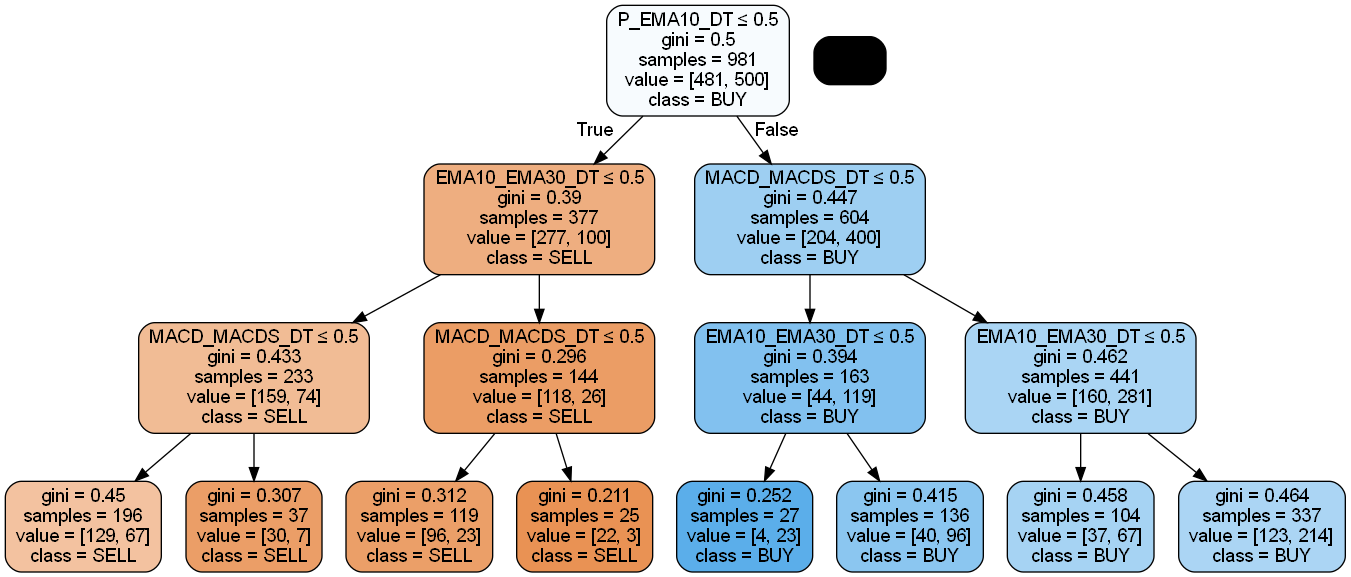

In [69]:
features = predictor_features_list

classes = {0: "SELL",
           1: "BUY"}

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, feature_names=features, class_names=classes, filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("THY_BUY_SELL_SIGNAL_DTClassification.png")
display(Image("THY_BUY_SELL_SIGNAL_DTClassification.png"))

In [70]:
from yellowbrick.classifier import ConfusionMatrix

C:\Users\halim\anaconda3\envs\AI_Env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


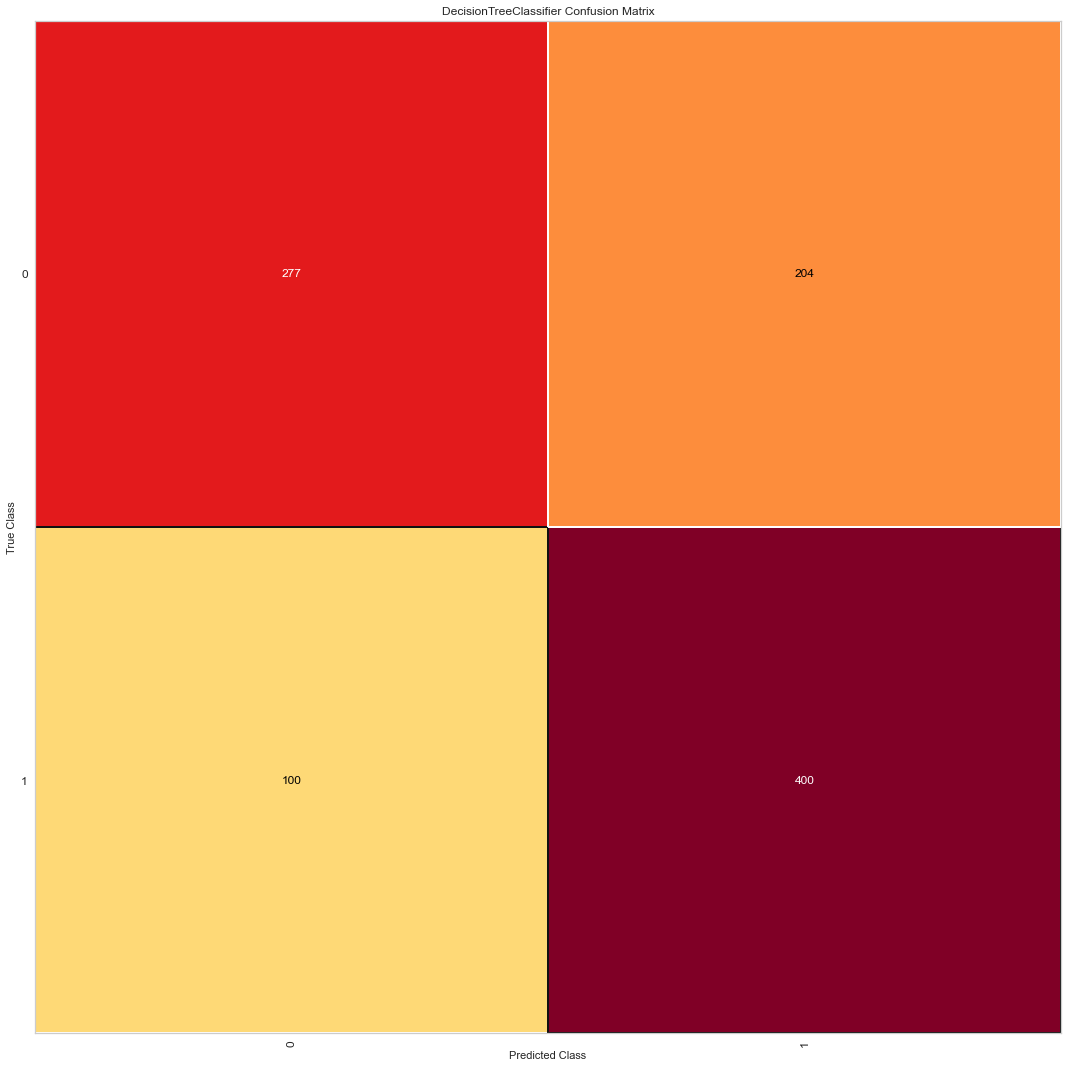

In [71]:
plt.figure(figsize=(15, 15))
categories = ["Sell", "Buy"]
confusion_matrix = ConfusionMatrix(classifier)
confusion_matrix.fit(X, y)
confusion_matrix.score(X, y)
confusion_matrix.poof()
plt.show()

C:\Users\halim\anaconda3\envs\AI_Env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


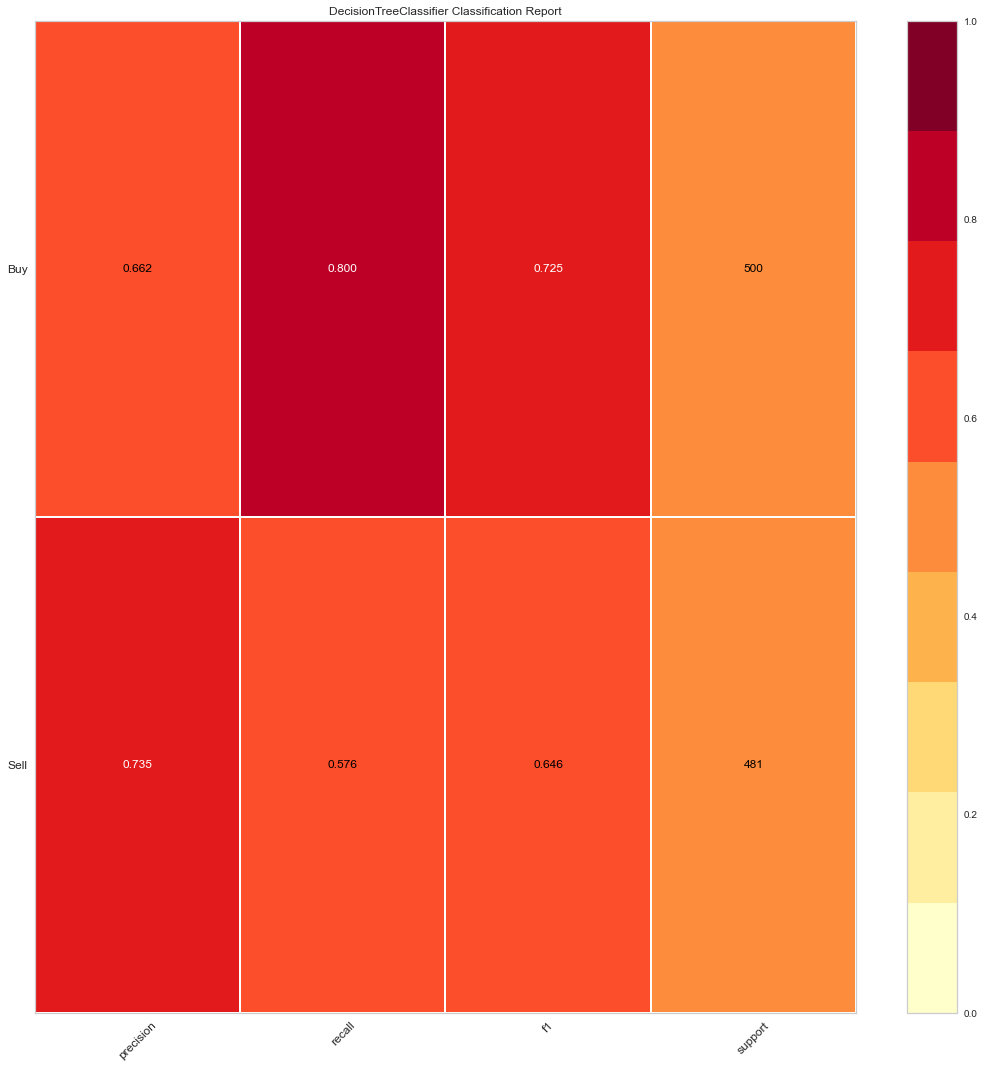

In [72]:
from yellowbrick.classifier import ClassificationReport

plt.figure(figsize=(15, 15))
classification_report = ClassificationReport(classifier, classes=categories, support=True)
classification_report.fit(X, y)
classification_report.score(X, y)
classification_report.poof()
plt.show()

C:\Users\halim\anaconda3\envs\AI_Env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


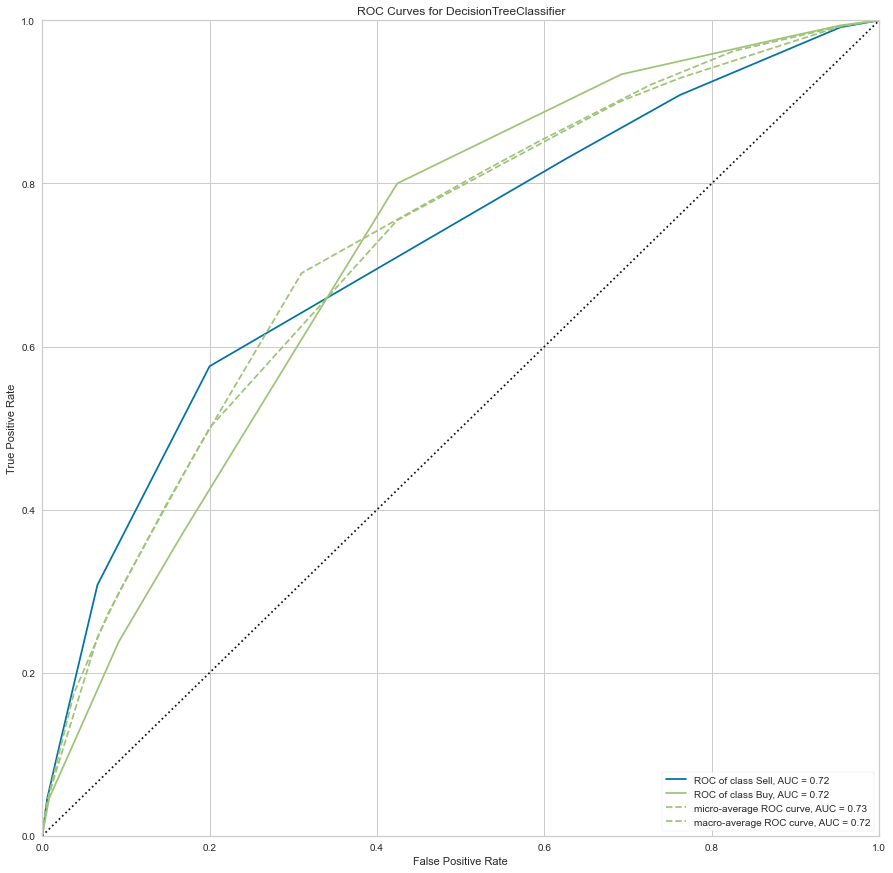

In [73]:
from yellowbrick.classifier import ROCAUC

plt.figure(figsize=(15, 15))
ROC = ROCAUC(classifier, macro=True, per_class=True, classes=categories)
ROC.fit(X, y)
ROC.score(X, y)
ROC.poof()
plt.show()

In [74]:
thy_stock["Predicted_Signal_DT"] = classifier.predict(X)

In [75]:
from sklearn.metrics import accuracy_score

print("Accuracy Score: %0.2f" % accuracy_score(thy_stock["Target_Class_DT"], thy_stock["Predicted_Signal_DT"]))

Accuracy Score: 0.69


In [76]:
thy_stock["Buy_DT"] = np.where((thy_stock["Predicted_Signal_DT"] == 1), 1, 0)
thy_stock["Sell_DT"] = np.where((thy_stock["Predicted_Signal_DT"] == 0), 1, 0)
thy_stock["Buy_DT_Indicator"] = np.where((thy_stock["Buy_DT"] > thy_stock["Buy_DT"].shift(1)), 1, 0)
thy_stock["Sell_DT_Indicator"] = np.where((thy_stock["Sell_DT"] > thy_stock["Sell_DT"].shift(1)), 1, 0)

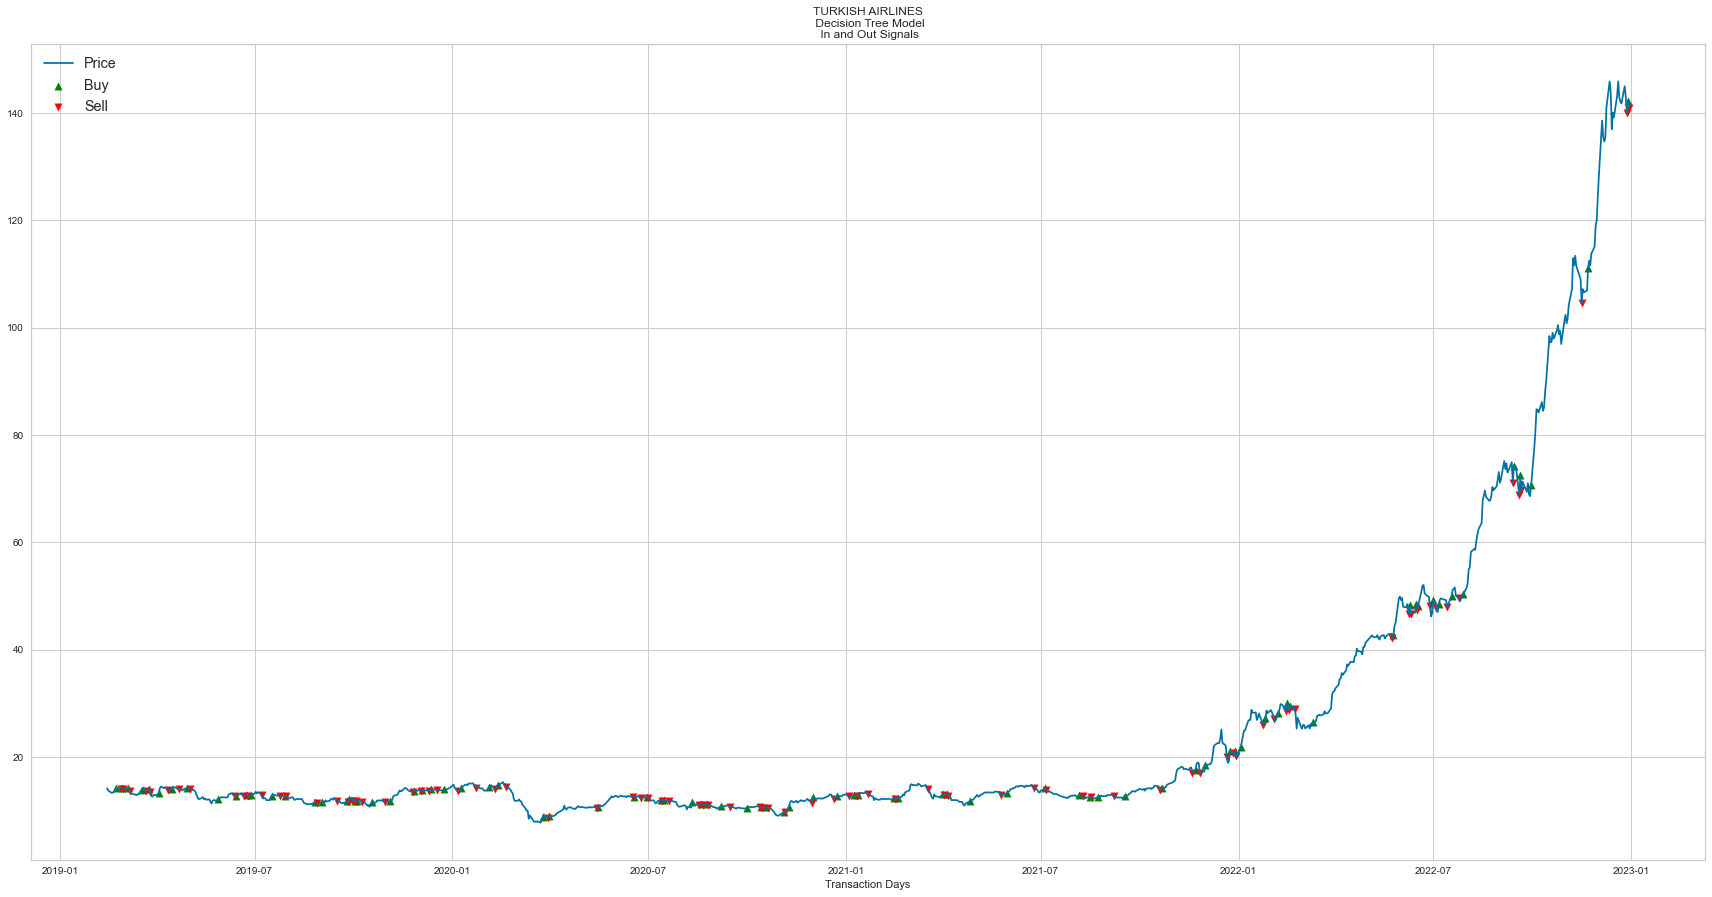

In [77]:
thy_stock["Date"] = thy_stock.index
fig1 = plt.figure(figsize=(30, 15))

plt.plot(thy_stock["Price"], label="Price")

plt.scatter(thy_stock.loc[thy_stock["Buy_DT_Indicator"] == 1, "Date"].values,
            thy_stock.loc[thy_stock["Buy_DT_Indicator"] == 1, "Price"].values,
            label="Buy", color="green", s=55, marker="^")

plt.scatter(thy_stock.loc[thy_stock["Sell_DT_Indicator"] == 1, "Date"].values,
            thy_stock.loc[thy_stock["Sell_DT_Indicator"] == 1, "Price"].values,
            label="Sell", color="red", s=55, marker="v")

plt.xlabel("Transaction Days")
plt.legend(loc='upper left', fontsize="large")
# plt.savefig("THY_Signals.jpg", format="jpg", dpi=1200)
plt.title("TURKISH AIRLINES\n Decision Tree Model\n In and Out Signals")
plt.show()

In [78]:
thy_stock["Value_DT"] = 1000 * (
        1 + (np.where(thy_stock["Buy_DT"] == 1, 0.95 * thy_stock["Return_Percentage"], 0)).cumsum())

In [79]:
period_DT = len(thy_stock)

highest_daily_losses_DT = 100 * round(thy_stock["Return_Percentage"].min(), 2)
highest_daily_profit_DT = 100 * round(thy_stock["Return_Percentage"].max(), 2)
standard_deviation_of_profit_DT = 100 * round(thy_stock["Return_Percentage"].std(), 2)

total_potential_yield_DT = 100 * round(
    sum(np.where((thy_stock["Return_Percentage"] > 0), thy_stock["Return_Percentage"], 0)), 2)

total_potential_loss_DT = 100 * round(
    sum(np.where((thy_stock["Return_Percentage"] < 0), thy_stock["Return_Percentage"], 0)), 2)

exact_yield_DT = 100 * thy_stock["Return_Percentage"].sum().round(2)
model_yield_DT = 100 * sum(np.where((thy_stock["Buy_DT"] == 1), thy_stock["Return_Percentage"], 0))

model_loss_protection_DT = 100 * sum(
    np.where((thy_stock["Sell_DT"] == 1), thy_stock["Return_Percentage"], 0).round(2))

stock1_price_beginning_DT = thy_stock["Price"][0].round(2)
stock1_price_ending_DT = thy_stock["Price"][-1].round(2)

beginning_ending_change_DT = 100 * (
        (thy_stock["Price"][-1] - thy_stock["Price"][0]) / thy_stock["Price"][0].round(2))

model_captured_profit_DT = 100 * (sum(
    np.where((thy_stock["Buy_DT"] == 1), thy_stock["Return_Percentage"], 0)) / sum(
    np.where((thy_stock["Return_Percentage"] > 0), thy_stock["Return_Percentage"], 0))).round(2)

final_price_DT = thy_stock["Value_DT"][-1].round(2)

In [80]:
print("----------------------")
print("DESCRIPTIVE STATISTICS")
print("----------------------")

print(f"PERIOD: {period_DT} DAYS")
print(f"HIGHEST DAILY LOSSES: {highest_daily_losses_DT} %")
print(f"HIGHEST DAILY PROFIT: {highest_daily_profit_DT} %")
print(f"STANDARD DEVIATION OF PROFIT: {standard_deviation_of_profit_DT} %")
print(f"TOTAL POTENTIAL YIELD: {total_potential_yield_DT} %")
print(f"TOTAL POTENTIAL LOSS: {total_potential_loss_DT} %")
print(f"EXACT YIELD: {exact_yield_DT} %")
print("----------------------")
print(f"PERFORMANCE OF THE MODEL")
print("----------------------")
print(f"YIELD GENERATED BY MODEL: {model_yield_DT} %")
print(f"MODEL'S AMOUNT OF PROTECTION FROM FINANCIAL LOSS: {model_loss_protection_DT} %")

print("----------------------")
print("REPORT")
print("----------------------")
print(
    f"While the share price was {stock1_price_beginning_DT} TL at the beginning of the period, the price at the end of the period was {stock1_price_ending_DT} TL with a {beginning_ending_change_DT}% change. The model was able to capture {model_captured_profit_DT}% of the total positive return. The investment of 1000 TL at the beginning of the period became {final_price_DT} liras in {period_DT} days.")
print("----------------------")

----------------------
DESCRIPTIVE STATISTICS
----------------------
PERIOD: 981 DAYS
HIGHEST DAILY LOSSES: -15.0 %
HIGHEST DAILY PROFIT: 10.0 %
STANDARD DEVIATION OF PROFIT: 3.0 %
TOTAL POTENTIAL YIELD: 1066.0 %
TOTAL POTENTIAL LOSS: -799.0 %
EXACT YIELD: 268.0 %
----------------------
PERFORMANCE OF THE MODEL
----------------------
YIELD GENERATED BY MODEL: 679.2747535246822 %
MODEL'S AMOUNT OF PROTECTION FROM FINANCIAL LOSS: -407.9999999999994 %
----------------------
REPORT
----------------------
While the share price was 14.17 TL at the beginning of the period, the price at the end of the period was 140.9 TL with a 894.3542259717038% change. The model was able to capture 64.0% of the total positive return. The investment of 1000 TL at the beginning of the period became 7453.11 liras in 981 days.
----------------------


In [81]:
thy_stock["Date"] = thy_stock.index

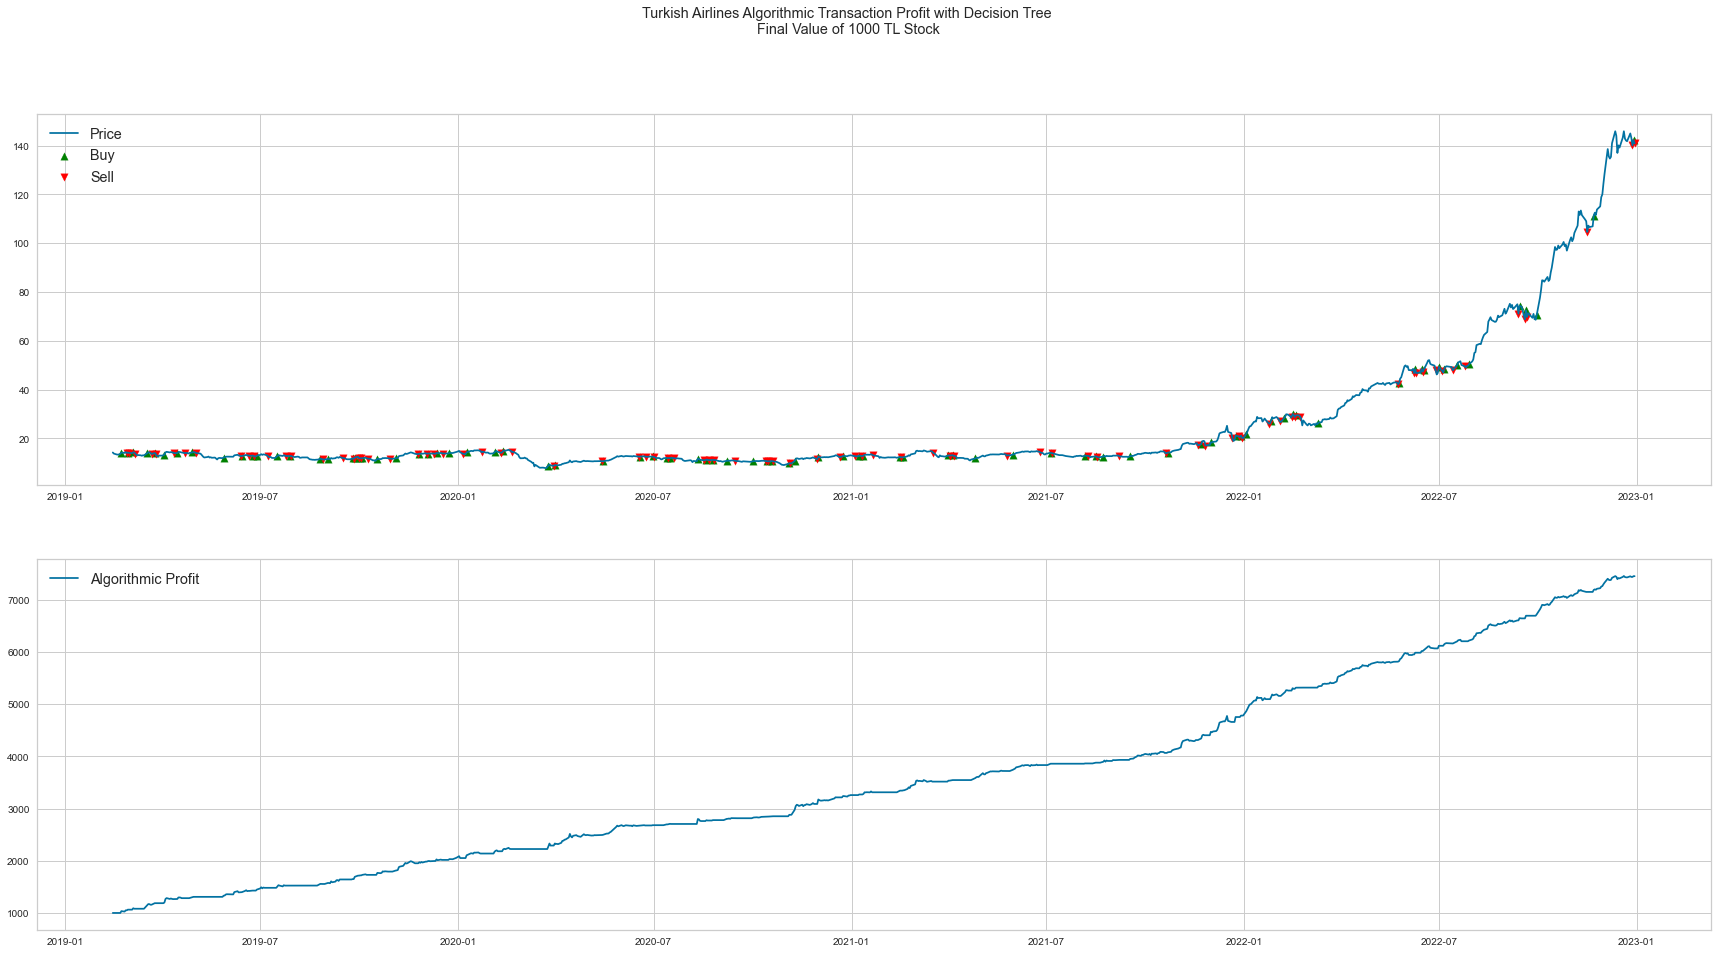

In [82]:
f, ax = plt.subplots(2, sharex="none", figsize=(30, 15))
f.suptitle("Turkish Airlines Algorithmic Transaction Profit with Decision Tree\n Final Value of 1000 TL Stock")

ax[0].plot(thy_stock["Price"], label="Price")

ax[0].scatter(thy_stock.loc[thy_stock["Buy_DT_Indicator"] == 1, "Date"].values,
              thy_stock.loc[thy_stock["Buy_DT_Indicator"] == 1, "Price"].values,
              label="Buy", color="green", s=55, marker="^")

ax[0].scatter(thy_stock.loc[thy_stock["Sell_DT_Indicator"] == 1, "Date"].values,
              thy_stock.loc[thy_stock["Sell_DT_Indicator"] == 1, "Price"].values,
              label="Sell", color="red", s=55, marker="v")

ax[0].legend(loc='upper left', fontsize="large")
ax[0].grid(True)

ax[1].plot(thy_stock["Value_DT"], "b", label="Algorithmic Profit")
ax[1].legend(loc='upper left', fontsize="large")
ax[1].grid(True)

plt.show()

C:\Users\halim\anaconda3\envs\AI_Env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


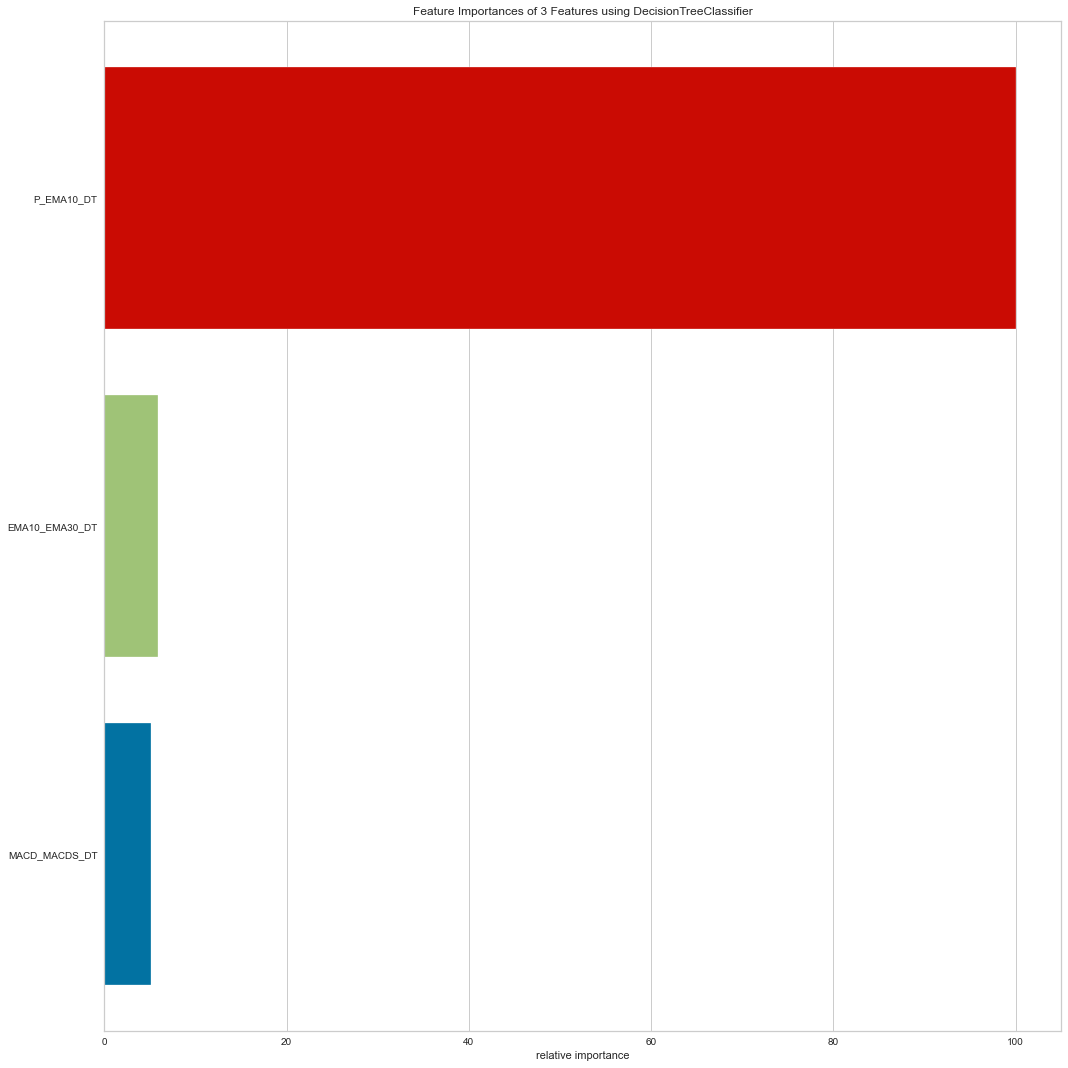

In [83]:
from yellowbrick.model_selection import FeatureImportances

plt.figure(figsize=(15, 15))
visualize_feature_importances = FeatureImportances(classifier)
visualize_feature_importances.fit(X, y)
visualize_feature_importances.show()
plt.show()

In [84]:
thy_stock

,Open,High,Low,Close,Price,Volume,Return,Return_Percentage,EMA10_ALG,Buy_Stock_S1,...,MACDS_DT,P_EMA10_DT,EMA10_EMA30_DT,MACD_MACDS_DT,Predicted_Signal_DT,Buy_DT,Sell_DT,Buy_DT_Indicator,Sell_DT_Indicator,Value_DT
Date,,,,,,,,,,,,,,,,,,,,,
2019-02-14,13.830000,14.600000,13.350000,14.170000,14.170000,150088919,0.380000,0.027556,14.549987,0,...,-0.161951,0,0,0,0,0,1,0,0,1000.000000
2019-02-15,14.150000,14.180000,13.580000,13.720000,13.720000,97899200,-0.450000,-0.031757,14.399080,0,...,-0.186857,0,0,0,0,0,1,0,0,1000.000000
2019-02-18,13.700000,13.950000,13.290000,13.320000,13.320000,89669902,-0.400001,-0.029155,14.202884,0,...,-0.220766,0,0,0,0,0,1,0,0,1000.000000
2019-02-19,13.290000,13.570000,13.240000,13.330000,13.330000,65627044,0.010000,0.000751,14.044178,0,...,-0.257878,0,0,0,0,0,1,0,0,1000.000000
2019-02-20,13.400000,13.520000,13.350000,13.430000,13.430000,63668551,0.100000,0.007502,13.932509,0,...,-0.292869,0,0,0,0,0,1,0,0,1000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,143.300003,145.300003,142.800003,145.000000,145.000000,43689692,3.199997,0.022567,141.463703,1,...,8.799260,1,1,0,1,1,0,0,0,7450.640500
2022-12-27,145.199997,146.600006,143.000000,143.100006,143.100006,63253933,-1.899994,-0.013103,141.761212,1,...,8.578078,1,1,0,1,1,0,0,0,7438.192264
2022-12-28,143.500000,143.800003,137.100006,140.100006,140.100006,48565337,-3.000000,-0.020964,141.459175,0,...,8.274531,0,1,0,0,0,1,0,1,7438.192264
